## Distance Metric Recommendation for $k$-Means Clustering: A Meta-Learning Approach

**Mark Edward M. Gonzales<sup>1</sup>, Lorene C. Uy<sup>1</sup>, Jacob Adrianne L. Sy<sup>1</sup>, Macario O. Cordel, II<sup>2</sup>**

<sup>1</sup> Department of Software Technology, College of Computer Studies, De La Salle University <br>
<sup>2</sup> Department of Computer Technology, College of Computer Studies, De La Salle University 

{mark_gonzales, lorene_c_uy, jacob_adrianne_l_sy, macario.cordel}@dlsu.edu.ph

<hr>

# PART I: Preliminaries

The following libraries and modules — most of which are automatically bundled with an Anaconda installation — were used in this notebook:

Library/Module | Description | License
:-- | :-- | :--
<a href = "https://docs.python.org/3/library/os.html">`os`</a> | Provides miscellaneous operating system interfaces | Python Software Foundation License
<a href = "https://docs.python.org/3/library/json.html">`json`</a> | Provides methods for encoding and decoding JavaScript Object Notation files | Python Software Foundation License
<a href = "https://docs.python.org/3/library/random.html">`random`</a> | Provides methods for pseudo-random number generators for various distributions | Python Software Foundation License
<a href = "https://pandas.pydata.org/">`pandas`</a> | Provides functions for data analysis and manipulation	 | BSD 3-Clause "New" or "Revised" License
<a href = "https://numpy.org/">`numpy`</a> | Provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays | BSD 3-Clause "New" or "Revised" License
<a href = "https://scikit-learn.org/stable/">`scikit-learn`</a> | Python module for machine learning and predictive data analysis | BSD 3-Clause "New" or "Revised" License
<a href = "https://seaborn.pydata.org/">`seaborn`</a> | Provides high-level interface for drawing attractive and informative statistical graphics | BSD 3-Clause "New" or "Revised" License
<a href = "https://shap.readthedocs.io/en/latest/index.html">`shap`</a> | Provides a game theoretic approach to explain the output of any machine learning model | MIT License
<a href = "https://imbalanced-learn.org/">`imblearn`</a> | Provides tools when dealing with classification with imbalanced classes | MIT License

*The descriptions were lifted from their respective websites.*
<br><br>

<div class="alert alert-block alert-info">
    <b>Note:</b>  The <a href = "https://shap.readthedocs.io/en/latest/index.html"><code>shap</code></a> and <a href = "https://imbalanced-learn.org/"><code>imblearn<code></a> libraries are not included in Anaconda by default. The fastest way to install these libraries is to use pip and run the following commands on the terminal: <br>

**`pip install shap`** <br>
**`pip install -U imbalanced-learn`**
</div>

<div class="alert alert-block alert-warning">
    The <a href = "https://imbalanced-learn.org/"><code>imblearn</code></a> library relies on the <a href = "https://scikit-learn.org/stable/"><code>scikit-learn</code></a> library to properly work. If the environment does not have such prerequisite, it is necessary to install the aforementioned library. A quick way to do so is by running the following command on the Anaconda prompt: <br>

**`conda install -c anaconda scikit-learn`**
</div>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt     

import shap

from os import listdir
import json
import random

pd.set_option('display.max_columns', None)

## Part II: Helper Functions

The function below create a confusion matrix given a set of ground truth labels and predicted labels.

**Preconditions**
- Global variables `y_test` and `y_pred` are correctly initialized for the associated confusion matrix
- Labels are only for `chebyshev`, `euclidean`, and `manhattan` distances

In [2]:
def generate_cm():
    cm = confusion_matrix(y_test, y_pred)

    ax = plt.subplot()
    sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='g', ax=ax) 

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['chebyshev', 'euclidean', 'manhattan'])
    ax.yaxis.set_ticklabels(['chebyshev', 'euclidean', 'manhattan']);

In [3]:
mf = pd.read_csv('dataset_labels/metafeatures_readable_header.csv')
mf

,Concentration Coeff (Mean),Concentration Coeff (SD),Shannon's Entropy (Mean),Shannon's Entropy (SD),Attr-to-Inst Ratio,Canonical Corr (Mean),Canonical Corr (SD),Correlation (Mean),Correlation (SD),Covariance (Mean),Covariance (SD),Eigenvalues (Mean),Eigenvalues (SD),Inst-to-Attr Ratio,IQ Range (Mean),IQ Range (SD),Kurtosis (Mean),Kurtosis (SD),Median Abs Dev (Mean),Median Abs Dev (SD),Mean (Mean),Mean (SD),Median (Mean),Median (SD),Num Attr,Num Binary Attr,Num Correlated Attr,Num Instances,Num Outliers,SD (Mean),SD (SD),Skewness (Mean),Skewness (SD),Sparsity (Mean),Sparsity (SD),Ave Num Feat per PCA Dim,Ave Num PCA Dim per Point,PCA-to-Orig Dim Ratio,Trimmed Mean (Mean),Trimmed Mean (SD),Variance (Mean),Variance (SD),1-Itemset Min,1-Itemset Q1,1-Itemset Q2,1-Itemset Q3,1-Itemset Max,2-Itemset Min,2-Itemset Q1,2-Itemset Q2,2-Itemset Q3,2-Itemset Max,best_dist_metric_ari,best_dist_metric_dbs
0,0.083137,0.074754,3.584954,2.680000e-06,0.010303,0.433018,0.253195,0.242233,0.228001,0.006188,0.007140,0.026026,0.041749,97.055556,0.159931,0.064418,2.513631,1.945351,0.111813,0.044872,0.533909,0.123819,0.546034,0.149180,18,0,0.117647,1747,18,0.157099,0.037752,-0.255920,0.959194,0.000003,0.000003,0.010303,0.004579,0.444444,0.541029,0.141732,0.026026,0.011921,0.082427,0.082999,0.083572,0.083572,0.084144,0.010303,0.147682,0.155695,0.161420,0.167716,manhattan,euclidean
1,0.037992,0.036260,3.584956,1.400000e-06,0.018359,0.217562,0.399361,0.125801,0.172071,0.000761,0.001704,0.006523,0.011931,54.468750,0.042397,0.039177,33.272982,52.948219,0.024941,0.017023,0.385131,0.211590,0.375140,0.226392,32,0,0.054435,1743,32,0.075021,0.030391,1.312286,2.743451,0.000004,0.000005,0.018359,0.010327,0.562500,0.377810,0.222477,0.006523,0.005573,0.082616,0.083190,0.083190,0.083764,0.083764,0.027539,0.148021,0.153758,0.158921,0.167527,euclidean,euclidean
2,0.086459,0.064692,3.321917,4.570000e-16,0.014241,0.477469,0.210690,0.220614,0.217854,0.005883,0.007251,0.027135,0.042013,70.222222,0.180279,0.102052,2.149467,3.067082,0.132495,0.076582,0.509929,0.113738,0.516168,0.133310,18,0,0.084967,1264,16,0.159905,0.040719,-0.064123,1.015054,0.000002,0.000002,0.014241,0.007120,0.500000,0.512890,0.126233,0.027135,0.014206,0.099684,0.099684,0.099684,0.100475,0.100475,0.011076,0.172468,0.183544,0.193038,0.200949,euclidean,chebyshev
3,0.046616,0.036637,3.321928,0.000000e+00,0.025397,-0.014967,0.440451,0.125810,0.176909,0.000887,0.001643,0.006914,0.011259,39.375000,0.046717,0.037670,14.749269,8.478498,0.027699,0.016243,0.390227,0.191658,0.379685,0.209539,32,0,0.048387,1260,32,0.080094,0.022687,0.693296,1.511454,0.000004,0.000006,0.025397,0.014286,0.562500,0.382475,0.205238,0.006914,0.003919,0.100000,0.100000,0.100000,0.100000,0.100000,0.034921,0.173016,0.182540,0.190476,0.200000,euclidean,manhattan
4,0.101427,0.026079,3.584958,2.430000e-06,0.009815,0.316617,0.442044,0.272287,0.228004,0.008253,0.007934,0.032809,0.050536,101.888889,0.182323,0.091332,4.554712,7.936434,0.120087,0.056295,0.521932,0.180440,0.544374,0.199597,18,0,0.130719,1834,15,0.177219,0.038538,-0.068994,1.885553,0.000003,0.000005,0.009815,0.004362,0.444444,0.535341,0.197395,0.032809,0.014218,0.082334,0.083424,0.083424,0.083424,0.083969,0.002181,0.147219,0.157579,0.163577,0.167394,euclidean,euclidean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.023432,0.021466,3.444974,1.128371e-02,0.006879,0.369102,0.550237,0.199823,0.188264,0.003710,0.004362,0.018055,0.020995,145.363636,0.161325,0.083825,8.264985,13.941371,0.115566,0.063067,0.265259,0.125157,0.246630,0.132074,11,0,0.109091,1599,11,0.130529,0.033453,1.679958,1.834576,0.009415,0.004153,0.006879,0.005003,0.727273,0.249116,0.131171,0.018055,0.009157,0.052533,0.081926,0.090056,0.097561,0.151970,0.081301,0.153221,0.164478,0.175735,0.249531,euclidean,euclidean
336,0.014634,0.017273,3.973324,2

The function below returns a pandas.Series containing the minimum and maximum of a given pandas.Series data.

**Parameter**:
- `x`: `pandas.Series data`

In [4]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

mf.apply(minMax)

,Concentration Coeff (Mean),Concentration Coeff (SD),Shannon's Entropy (Mean),Shannon's Entropy (SD),Attr-to-Inst Ratio,Canonical Corr (Mean),Canonical Corr (SD),Correlation (Mean),Correlation (SD),Covariance (Mean),Covariance (SD),Eigenvalues (Mean),Eigenvalues (SD),Inst-to-Attr Ratio,IQ Range (Mean),IQ Range (SD),Kurtosis (Mean),Kurtosis (SD),Median Abs Dev (Mean),Median Abs Dev (SD),Mean (Mean),Mean (SD),Median (Mean),Median (SD),Num Attr,Num Binary Attr,Num Correlated Attr,Num Instances,Num Outliers,SD (Mean),SD (SD),Skewness (Mean),Skewness (SD),Sparsity (Mean),Sparsity (SD),Ave Num Feat per PCA Dim,Ave Num PCA Dim per Point,PCA-to-Orig Dim Ratio,Trimmed Mean (Mean),Trimmed Mean (SD),Variance (Mean),Variance (SD),1-Itemset Min,1-Itemset Q1,1-Itemset Q2,1-Itemset Q3,1-Itemset Max,2-Itemset Min,2-Itemset Q1,2-Itemset Q2,2-Itemset Q3,2-Itemset Max,best_dist_metric_ari,best_dist_metric_dbs
min,-0.000181,9.760000e-10,0.011808,0.000,0.000018,-0.549442,1.730000e-15,1.620000e-17,0.016257,1.630000e-18,0.000025,0.000592,0.000378,0.351051,0.0,0.000000,-1.743801,0.00016,0.0000,0.000000,0.002169,1.240000e-16,0.000000,0.000000,1,0,0.0,12,0,0.022006,0.000463,-85.573898,9.630000e-16,0.000000,0.000000,0.000018,0.000018,0.032258,0.000000,0.00000,0.000592,0.000173,0.000016,0.000474,0.013894,0.017347,0.028593,0.00,0.000947,0.030531,0.037750,0.056312,euclidean,chebyshev
max,0.740700,3.870616e-01,5.717561,2.236,2.848592,1.000000,9.464867e-01,9.466801e-01,0.403957,1.084682e-01,0.101597,0.223947,0.837698,55579.666670,1.0,0.516398,27049.274270,46326.24067,0.7413,0.341911,0.738590,3.811833e-01,0.803571,0.518875,7507,5055,1.0,381109,7507,0.472892,0.183698,79.581567,1.468952e+02,0.526229,0.417335,2.848592,0.880000,1.000000,0.764055,0.43401,0.223947,0.108245,0.480000,0.500000,0.750000,1.000000,1.000000,0.35,0.475524,0.609272,0.999053,1.000000,manhattan,manhattan


## Part III: Train-Test Split

The meta-feature dataset was subjected to a 70%-30% stratified train-test split, resulting in the training and test sets having sizes of **238** and **102**, respectively.

In [5]:
X = mf.loc[:, ~mf.columns.isin(['best_dist_metric_ari', 'best_dist_metric_dbs'])]
y_ari = mf.loc[:, mf.columns.isin(['best_dist_metric_ari'])]
y_dbs = mf.loc[:, mf.columns.isin(['best_dist_metric_dbs'])]

# The datasets were divided via a stratified 70%-30% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_dbs, stratify = y_dbs, test_size=0.3, random_state=942)

In [6]:
X_train

,Concentration Coeff (Mean),Concentration Coeff (SD),Shannon's Entropy (Mean),Shannon's Entropy (SD),Attr-to-Inst Ratio,Canonical Corr (Mean),Canonical Corr (SD),Correlation (Mean),Correlation (SD),Covariance (Mean),Covariance (SD),Eigenvalues (Mean),Eigenvalues (SD),Inst-to-Attr Ratio,IQ Range (Mean),IQ Range (SD),Kurtosis (Mean),Kurtosis (SD),Median Abs Dev (Mean),Median Abs Dev (SD),Mean (Mean),Mean (SD),Median (Mean),Median (SD),Num Attr,Num Binary Attr,Num Correlated Attr,Num Instances,Num Outliers,SD (Mean),SD (SD),Skewness (Mean),Skewness (SD),Sparsity (Mean),Sparsity (SD),Ave Num Feat per PCA Dim,Ave Num PCA Dim per Point,PCA-to-Orig Dim Ratio,Trimmed Mean (Mean),Trimmed Mean (SD),Variance (Mean),Variance (SD),1-Itemset Min,1-Itemset Q1,1-Itemset Q2,1-Itemset Q3,1-Itemset Max,2-Itemset Min,2-Itemset Q1,2-Itemset Q2,2-Itemset Q3,2-Itemset Max
305,0.322222,0.253059,0.476828,4.617001e-01,0.916667,0.577350,0.293341,0.181706,0.169069,0.099174,0.069207,0.198347,0.406188,1.090909,0.363636,0.323335,-1.421296,0.689195,0.134782,0.299871,0.454545,0.269680,0.454545,0.471940,11,10,0.454545,12,8,0.423873,0.143341,0.000000,0.906424,5.041322e-01,1.644607e-01,0.916667,0.250000,0.272727,0.454545,0.367733,0.198347,0.071214,0.250000,0.500000,0.750000,1.000000,1.000000,0.000000,0.250000,0.500000,0.750000,1.000000
41,0.167677,0.180758,1.778466,4.353021e-01,0.287129,0.673019,0.322741,0.433528,0.325098,0.016564,0.013791,0.037652,0.116672,3.482759,0.170790,0.104629,11.547024,17.104955,0.103620,0.101944,0.160345,0.106120,0.105192,0.119629,29,0,0.445813,101,27,0.191005,0.034803,2.698309,2.150998,4.594872e-02,5.596950e-02,0.287129,0.069307,0.241379,0.111715,0.107427,0.037652,0.012387,0.019802,0.217822,0.247525,0.267327,0.910891,0.000000,0.306931,0.386139,0.475248,0.930693
318,0.074528,0.142425,3.248805,1.777973e+00,0.000792,0.402466,0.293341,0.199169,0.200762,0.018700,0.030306,0.092934,0.153352,1262.500000,0.410740,0.382521,5.309355,13.659264,0.101920,0.104995,0.521464,0.224959,0.405165,0.346416,12,4,0.106061,15150,6,0.269331,0.149159,-0.563647,2.436732,1.738030e-01,2.415025e-01,0.000792,0.000462,0.583333,0.490411,0.268740,0.092934,0.092014,0.011881,0.041650,0.041650,0.041716,0.853861,0.032739,0.078152,0.080990,0.096832,0.858548
28,0.120202,0.101529,1.556593,1.030307e+00,0.014493,0.257976,0.322741,0.039818,0.162325,0.004398,0.012319,0.130253,0.097847,69.000000,0.642857,0.505076,-0.722180,0.936591,0.105900,0.149765,0.636387,0.063318,0.803571,0.277792,2,0,0.000000,138,1,0.346914,0.140740,-0.666910,0.089456,1.920620e-01,1.929060e-01,0.014493,0.014493,1.000000,0.707483,0.127472,0.130253,0.097649,0.130435,0.195652,0.217391,0.260870,0.739130,0.217391,0.391304,0.500000,0.608696,0.782609
124,0.032130,0.014815,2.000000,0.000000e+00,0.100000,0.750482,0.322741,0.079348,0.048839,0.007005,0.004350,0.088540,0.026577,10.000000,0.511112,0.037602,-1.240437,0.086741,0.377278,0.022635,0.502415,0.025351,0.517263,0.051215,10,0,0.000000,100,0,0.297427,0.009290,-0.078297,0.145143,0.000000e+00,0.000000e+00,0.100000,0.100000,1.000000,0.508851,0.035466,0.088540,0.005538,0.250000,0.250000,0.250000,0.250000,0.250000,0.260000,0.340000,0.380000,0.400000,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.018627,0.023549,0.917069,1.225434e-01,0.253968,0.153943,0.400031,0.141531,0.099027,0.030947,0.020916,0.223947,0.301301,3.937500,0.843750,0.365963,-1.326413,1.217961,0.000000,0.000000,0.377108,0.109666,0.078125,0.270490,64,64,0.004960,252,10,0.471126,0.044939,0.574373,0.595346,4.980080e-01,0.000000e+00,0.253968,0.198413,0.781250,0.303762,0.166677,0.223947,0.038751,0.119048,0.416667,0.500000,0.583333,0.880952,0.067460,0.420635,0.500000,0.579365,0.932540
54,0.100603,0.113401,1.544826,2.944796e-02,0.024000,0.939763,0.293341,0.294476,0.192756,0.051897,0.034394,0.175858,0.151488,41.666667,0.833333,0.258199,-1.

<hr>

## Part IV: Hyperparameter Tuning

Hyperparameter tuning was conducted via grid search with five-fold stratified cross-validation to optimize the model’s accuracy. To attempt to address the problem of data imbalance, class balancing was performed within each fold; three techniques were utilized: (i) synthetic minority oversampling technique (SMOTE), (ii) borderline SMOTE, and (iii) adaptive synthetic algorithm (ADASYN).

Hyperparameter Tuning was done based on:
- `Number of trees`: 50
- `Splitting criterion`: Gini
- `Maximum depth`: 15
- `Minimum number of samples to be leaf node`: 3
- `Minimum number of samples to split internal node`: 2
- `Number of features to consider at each split`: log<sub>2</sub> of the number of features
- `Warm start`: True
- `Minimum impurity decrease`: 0.0
- `Complexity parameter for minimal cost-complexity pruning`: 0.0

### 1. Synthetic Minority Oversampling (SMOTE)

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(
    [('resample', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1))]
)

kf = StratifiedKFold(n_splits=5, shuffle=True)
    
parameters = {'model__n_estimators': [10, 50, 100, 150],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth': [5, 15, 25, 35],
              'model__max_features': ['sqrt', 'log2'],
              'model__min_samples_split': [2, 3, 4],
              'model__min_samples_leaf': [1, 2, 3, 4],
              'model__warm_start': [True, False],
              'model__min_impurity_decrease': [0.0, 0.5, 1.0],
              'model__ccp_alpha': [0.0, 0.5, 1.0]}

clf = GridSearchCV(estimator=pipe, param_grid=parameters, cv=kf, scoring='accuracy', n_jobs=-1)

clf.fit(X_train, y_train.values.ravel())
    
print(clf.best_params_)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

**Results:**
- Accuracy: 63.73%
- Macro-F1: 60.29%
- Macro-Precision: 60.78%
- Macro-Recall: 60.32%
- Weighted F1: 63.52%
- Weighted Precision: 63.90%
- Weighted Recall: 63.73%

### 2. Adaptive Synthetic Algorithm (ADASYN)

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN 
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(
    [('resample', ADASYN(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1))]
)

kf = StratifiedKFold(n_splits=5, shuffle=True)
    
parameters = {'model__n_estimators': [10, 50, 100, 150],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth': [5, 15, 25, 35],
              'model__max_features': ['sqrt', 'log2'],
              'model__min_samples_split': [2, 3, 4],
              'model__min_samples_leaf': [1, 2, 3, 4],
              'model__warm_start': [True, False],
              'model__min_impurity_decrease': [0.0, 0.5, 1.0],
              'model__ccp_alpha': [0.0, 0.5, 1.0]}

clf = GridSearchCV(estimator=pipe, param_grid=parameters, cv=kf, scoring='accuracy', n_jobs=-1)

clf.fit(X_train, y_train.values.ravel())
    
print(clf.best_params_)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

**Results:**
- Accuracy: 65.69%
- Macro-F1: 63.01%
- Macro-Precision: 63.06%
- Macro-Recall: 63.10%
- Weighted F1: 65.43%
- Weighted Precision: 65.34%
- Weighted Recall: 65.69%

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE 
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(
    [('resample', BorderlineSMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1))]
)

kf = StratifiedKFold(n_splits=5, shuffle=True)
    
parameters = {'model__n_estimators': [10, 50, 100, 150],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth': [5, 15, 25, 35],
              'model__max_features': ['sqrt', 'log2'],
              'model__min_samples_split': [2, 3, 4],
              'model__min_samples_leaf': [1, 2, 3, 4],
              'model__warm_start': [True, False],
              'model__min_impurity_decrease': [0.0, 0.5, 1.0],
              'model__ccp_alpha': [0.0, 0.5, 1.0]}

clf = GridSearchCV(estimator=pipe, param_grid=parameters, cv=kf, scoring='accuracy', n_jobs=-1)

clf.fit(X_train, y_train.values.ravel())
    
print(clf.best_params_)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

**Results:**
- Accuracy: 70.59%
- Macro-F1: 67.86%
- Macro-Precision: 67.95%
- Macro-Recall: 67.92%
- Weighted F1: 70.35%
- Weighted Precision: 70.29%
- Weighted Recall: 70.59%

Optimized parameters for the machine learning model are:
- `Number of trees`: 50
- `Splitting criterion`: Gini
- `Maximum depth`: 15
- `Minimum number of samples to be leaf node`: 3
- `Minimum number of samples to split internal node`: 2
- `Number of features to consider at each split`: log<sub>2</sub> of the number of features
- `Warm start`: True
- `Minimum impurity decrease`: 0.0
- `Complexity parameter for minimal cost-complexity pruning`: 0.0

<hr>

## Part V: Model Evaluation

Framing the recommendation of the optimal distance metric as a multiclass classification problem posits the vector of meta-features as the input and the distance metric as the output. The meta-features were fed to a random forest
classifier similar to the work of Zhu et al. (2020).

In [11]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE 
from sklearn.ensemble import RandomForestClassifier

X_train_resampled, y_train_resampled = BorderlineSMOTE(random_state=42).fit_resample(X_train, y_train)

clf = RandomForestClassifier(ccp_alpha = 0, criterion = 'gini', max_features = 'log2', min_impurity_decrease = 0,
                             min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50, warm_start = True, 
                             random_state=42, n_jobs=-1)
clf.fit(X_train_resampled, y_train_resampled.values.ravel())

y_pred = clf.predict(X_test)

The models were evaluated based on their accuracy (micro-F1) and macro- and micro-averaged F1, precision, and recall.

**Results:**
- Accuracy: 70.59%
- Macro-F1: 67.86%
- Macro-Precision: 67.95%
- Macro-Recall: 67.92%
- Weighted F1: 70.35%
- Weighted Precision: 70.29%
- Weighted Recall: 70.59%

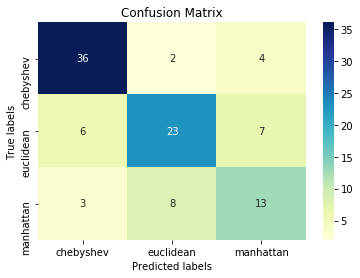

In [12]:
generate_cm()

<hr>

## PART VI: Fine-Grained Analysis

## A. Feature Importance

Shapley Additive Explanations (SHAP), a game-theoretic and model-agnostic approach for interpreting the outputs of a machine learning model, was used to analyze the importance of the features. SHAP addresses the challenge of interpreting an ensemble model by approximating it using a linear explanation model.

The SHAP values obtained were plotted to visualize the importance of each meta-feature for the prediction of each class.

In [9]:
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_train)
shap_values

[array([[ 0.00129203, -0.00305252,  0.04303475, ...,  0.0101167 ,
          0.01212836,  0.01013663],
        [ 0.00072584, -0.00426881, -0.01509188, ..., -0.00069481,
         -0.00485473, -0.00257454],
        [-0.00252794, -0.00068916, -0.02465392, ..., -0.00558048,
         -0.00194777, -0.00230223],
        ...,
        [-0.00498751,  0.00280041, -0.02304692, ..., -0.004239  ,
         -0.00898719, -0.00105334],
        [ 0.00751204,  0.00011307,  0.06453896, ...,  0.01246616,
          0.03009969, -0.00110827],
        [-0.00154203,  0.00288807, -0.01761723, ..., -0.0013752 ,
         -0.00905305, -0.00535502]]),
 array([[-0.00301861,  0.000208  , -0.0142859 , ..., -0.00461562,
         -0.00309446,  0.00394756],
        [-0.01337075, -0.00473266,  0.00011059, ..., -0.00061593,
         -0.01186059, -0.00069261],
        [ 0.0135943 ,  0.00815853,  0.0175635 , ...,  0.00472702,
         -0.00034038,  0.00187972],
        ...,
        [ 0.00799771, -0.00266068,  0.02093769, ...,  

### Global Feature Importance

The code below displays the top 15 meta-features based on the mean absolute value of SHAP values

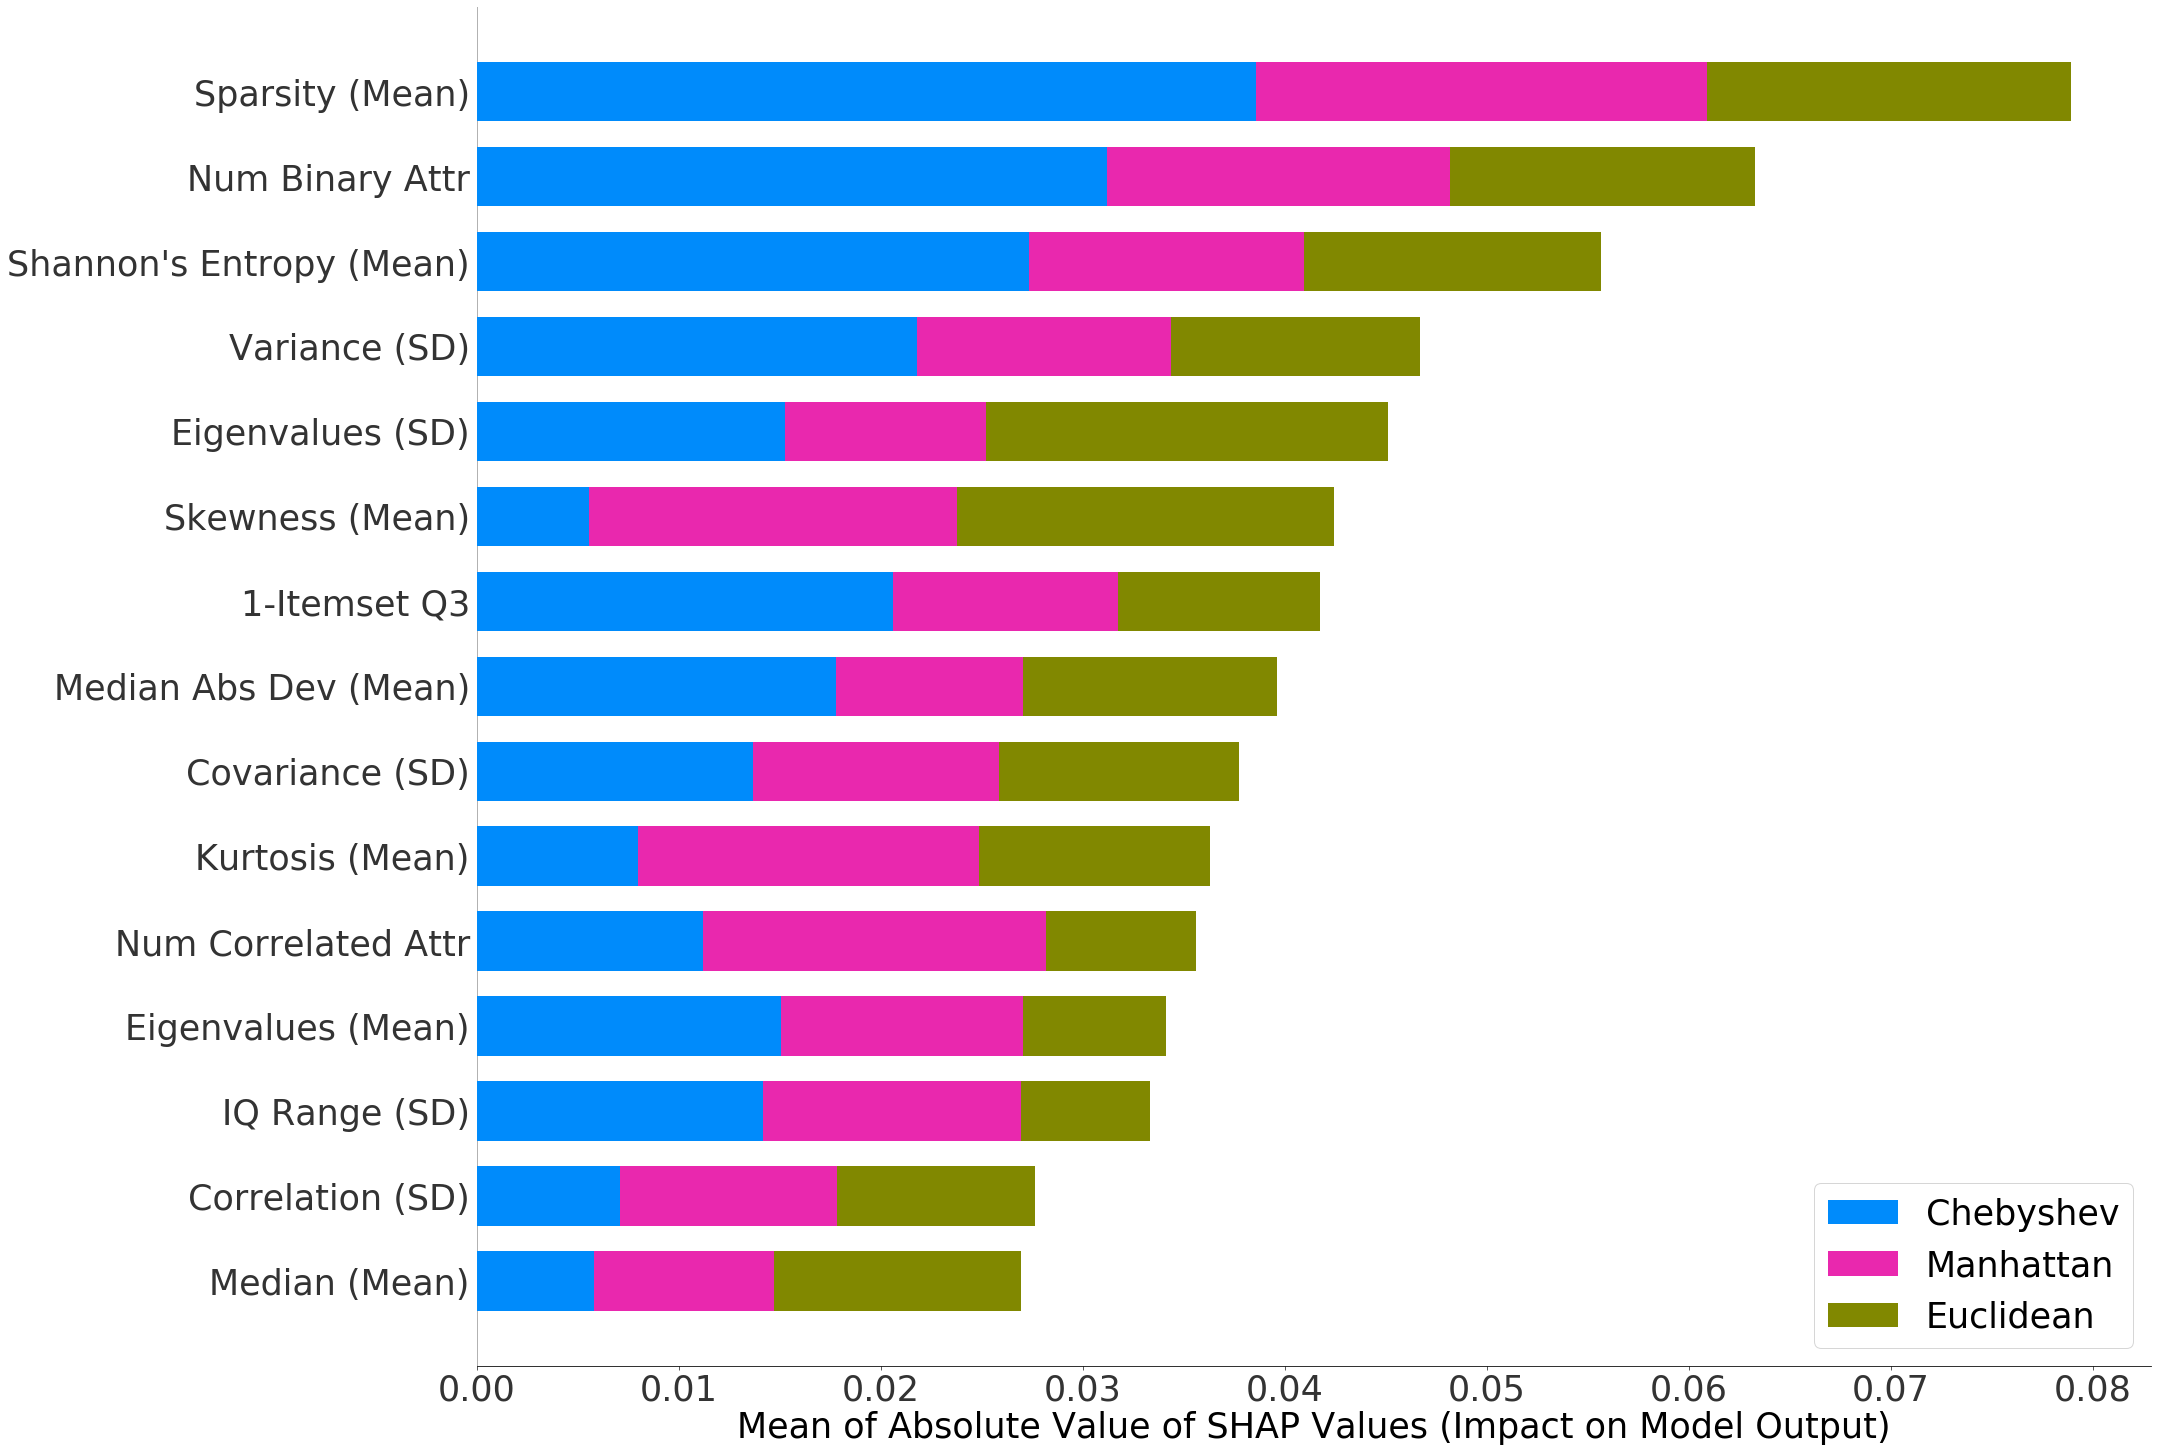

In [15]:
SIZE = 35
SS = 25
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR



plt_shap = shap.summary_plot(shap_values, 
                             features=X_train, 
                             feature_names=X_train.columns,
                             show=False, 
                             plot_size=(30,SS),
                             max_display=15,
                             class_names = ['Chebyshev', 'Euclidean', 'Manhattan'])

plt.xlabel('Mean of Absolute Value of SHAP Values (Impact on Model Output)', fontsize=SIZE)
plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)
plt.legend(fontsize=SIZE)

plt.savefig("shap.png", bbox_inches='tight')

The code below displays the ranking of all meta-features based on the mean absolute value of SHAP values

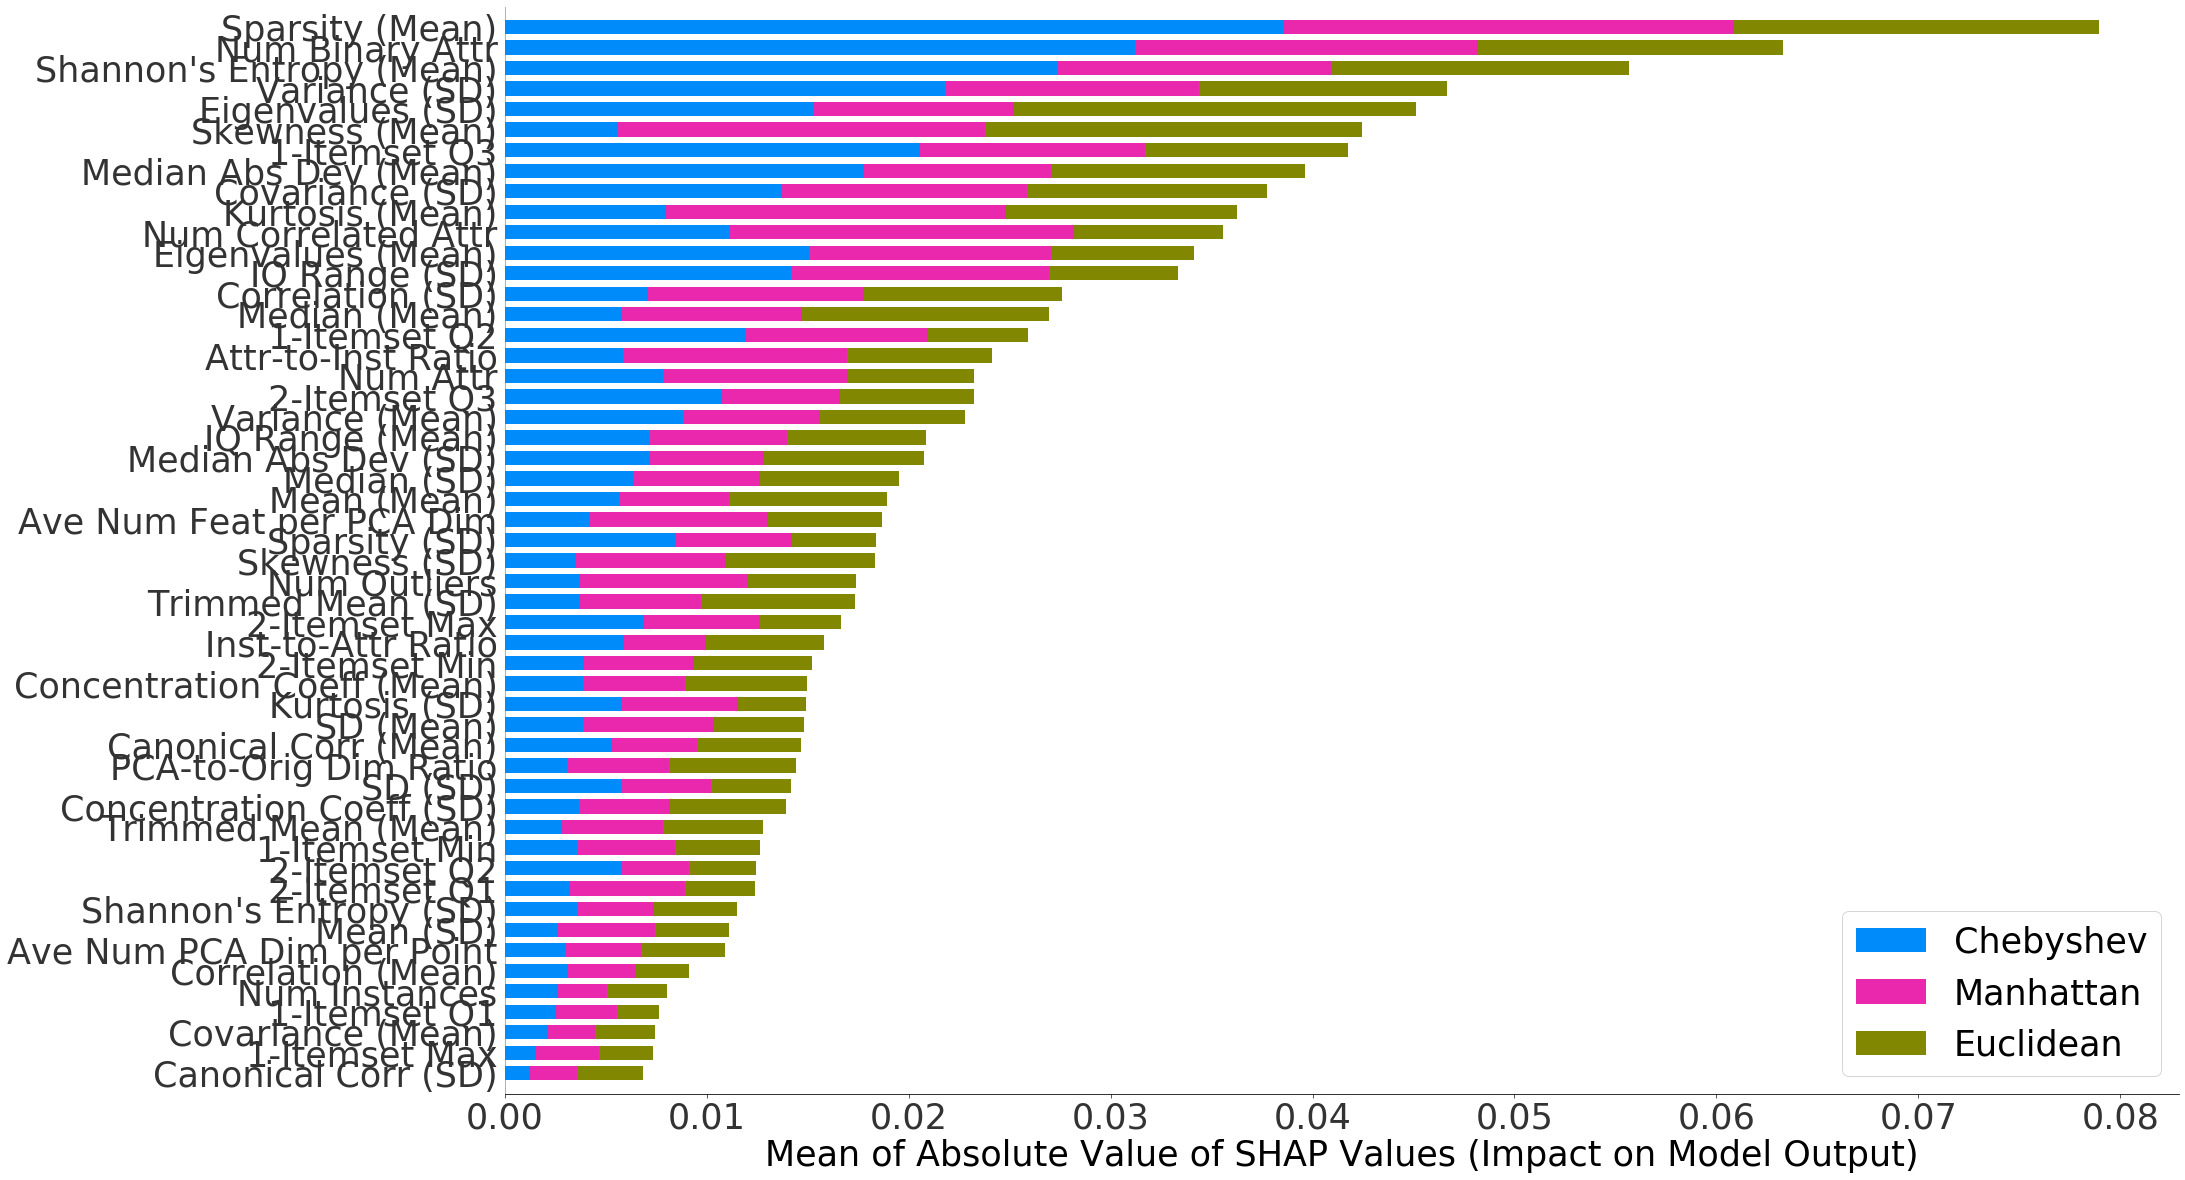

In [16]:
SIZE = 35
SS = 20
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR



plt_shap = shap.summary_plot(shap_values, 
                             features=X_train, 
                             feature_names=X_train.columns,
                             show=False, 
                             plot_size=(30,SS),
                             max_display=60,
                             class_names = ['Chebyshev', 'Euclidean', 'Manhattan'])

plt.xlabel('Mean of Absolute Value of SHAP Values (Impact on Model Output)', fontsize=SIZE)
plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)
plt.legend(fontsize=SIZE)

The code below prints the absolute values of the SHAP values of each of the meta-features with respect to the three classes (distance metrics). 

In [17]:
for i in range(len(shap_values)):
    global_shap_values = np.abs(shap_values[i]).mean(0)
    print(global_shap_values)

[0.00388088 0.00367034 0.02733616 0.00359983 0.00586595 0.00531725
 0.00123119 0.00312198 0.00707674 0.00216988 0.01367878 0.01507225
 0.01524556 0.00589439 0.00713416 0.01418734 0.00798984 0.00574751
 0.01780046 0.00720874 0.00564432 0.00266011 0.0058148  0.00633403
 0.0078212  0.03119318 0.01117993 0.00265349 0.00373048 0.00389214
 0.00577214 0.00556627 0.0035241  0.03859396 0.00849669 0.00415724
 0.00306112 0.00310759 0.00283361 0.0037147  0.00884772 0.0217965
 0.00359185 0.00255156 0.01188813 0.02058347 0.00156661 0.00395234
 0.00323877 0.005779   0.01074048 0.00691606]
[0.00603525 0.00571819 0.01474091 0.00411219 0.00718553 0.00515233
 0.00326068 0.00259201 0.0097986  0.00296449 0.0118703  0.00707094
 0.01989808 0.00585204 0.00691659 0.00636208 0.01144572 0.00333887
 0.01259017 0.00789945 0.00780748 0.00365574 0.01223436 0.00689314
 0.00625611 0.01510614 0.00740902 0.00300607 0.00534817 0.0044599
 0.00394109 0.01866602 0.00741499 0.01804853 0.00419392 0.00565277
 0.00414944 0.0063

### Feature Importance per Class (Distance Metric)

A more fine-grained analysis was performed by limiting the domain of the computation of the SHAP values to a specific class (distance metric). 

The code below displays the beeswarm plot for the 15 most important features for predicting Chebyshev distance.

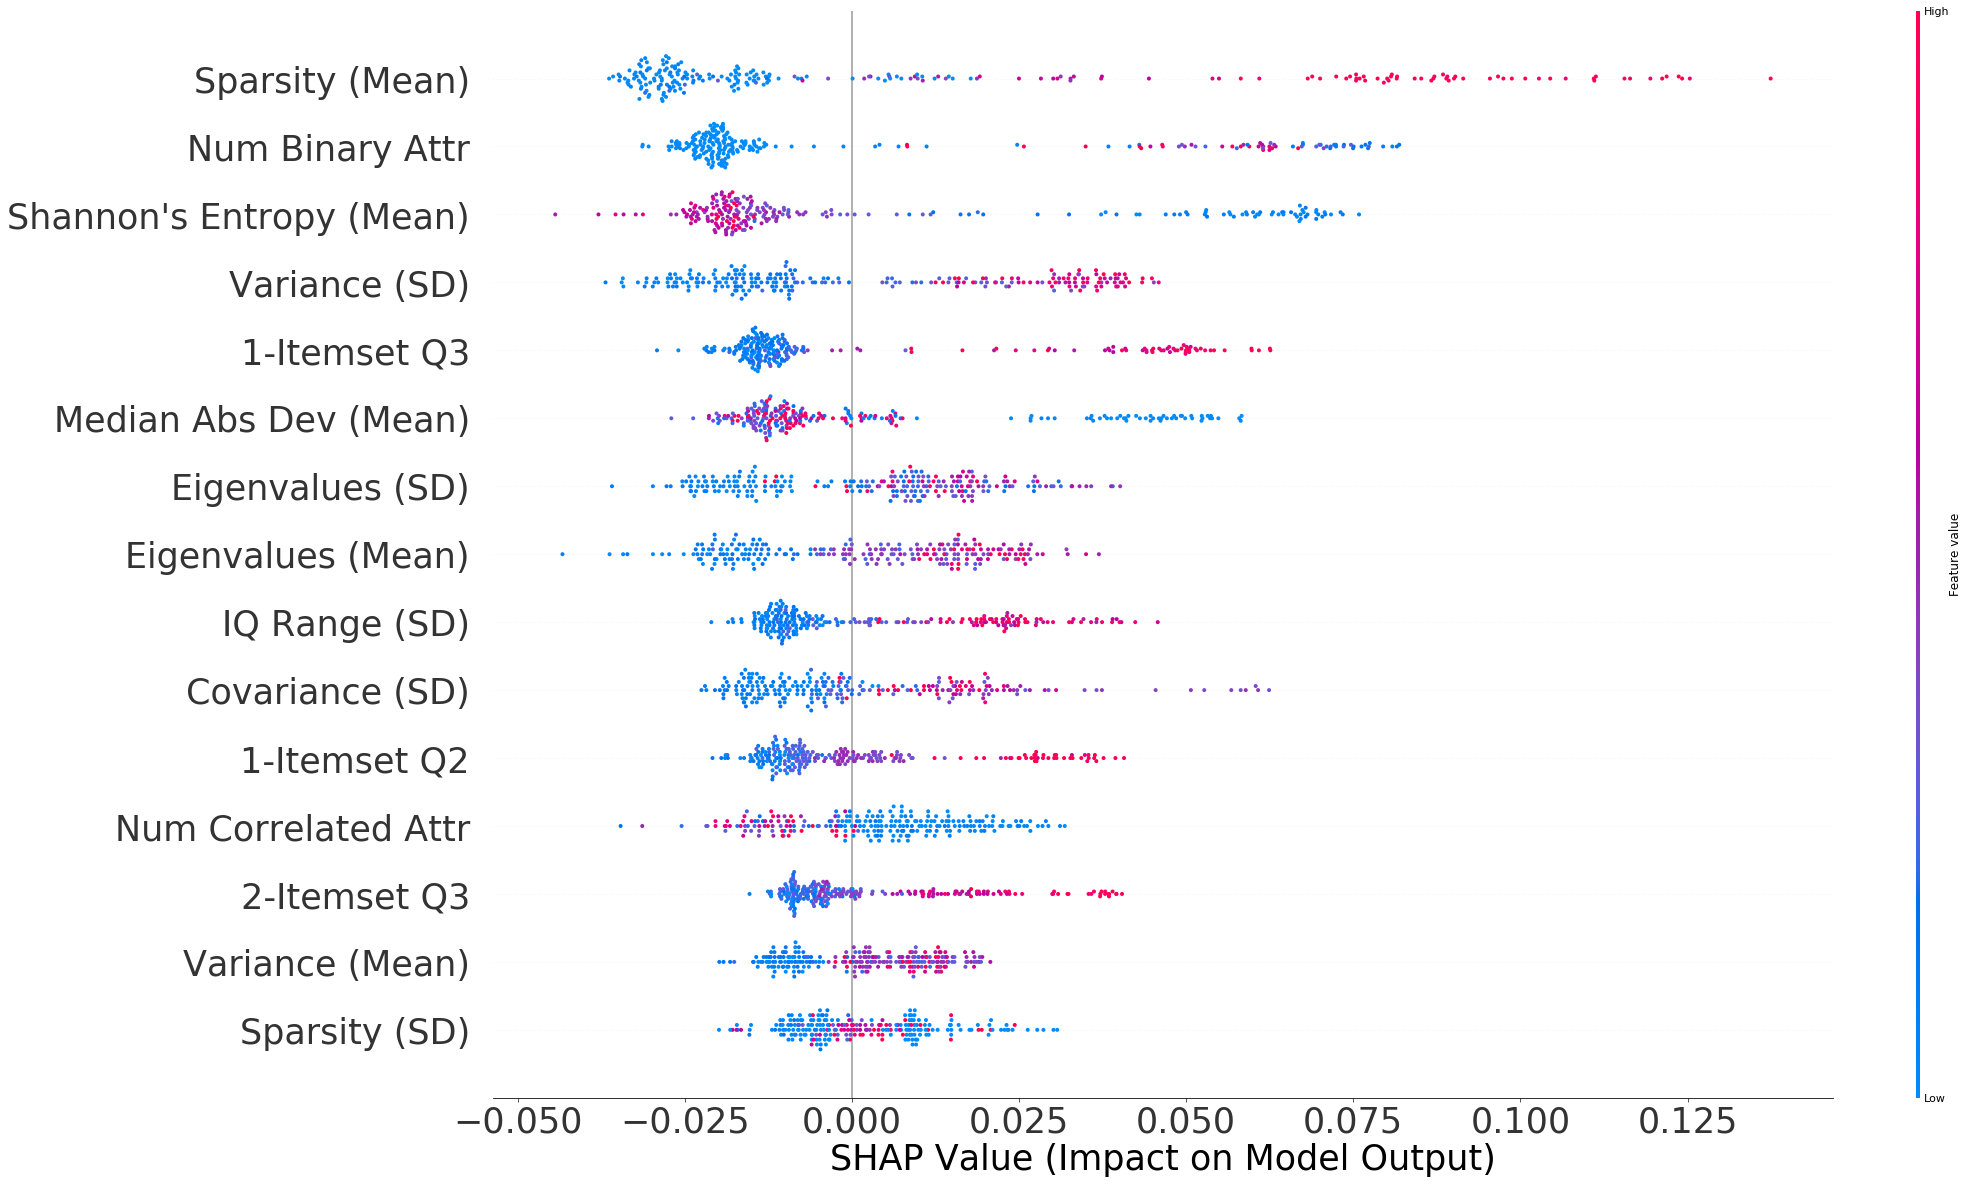

In [18]:
plt_shap = shap.summary_plot(shap_values[0], 
                             features=X_train, 
                             feature_names=X_train.columns, 
                             show=False,
                             plot_size=(30,SS),
                             max_display=15) 

plt.xlabel('SHAP Value (Impact on Model Output)', fontsize=SIZE)
plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)

plt.savefig("shap_chebyshev.png", bbox_inches='tight')

The code below displays the beeswarm plot for the 15 most important features for predicting Euclidean distance.

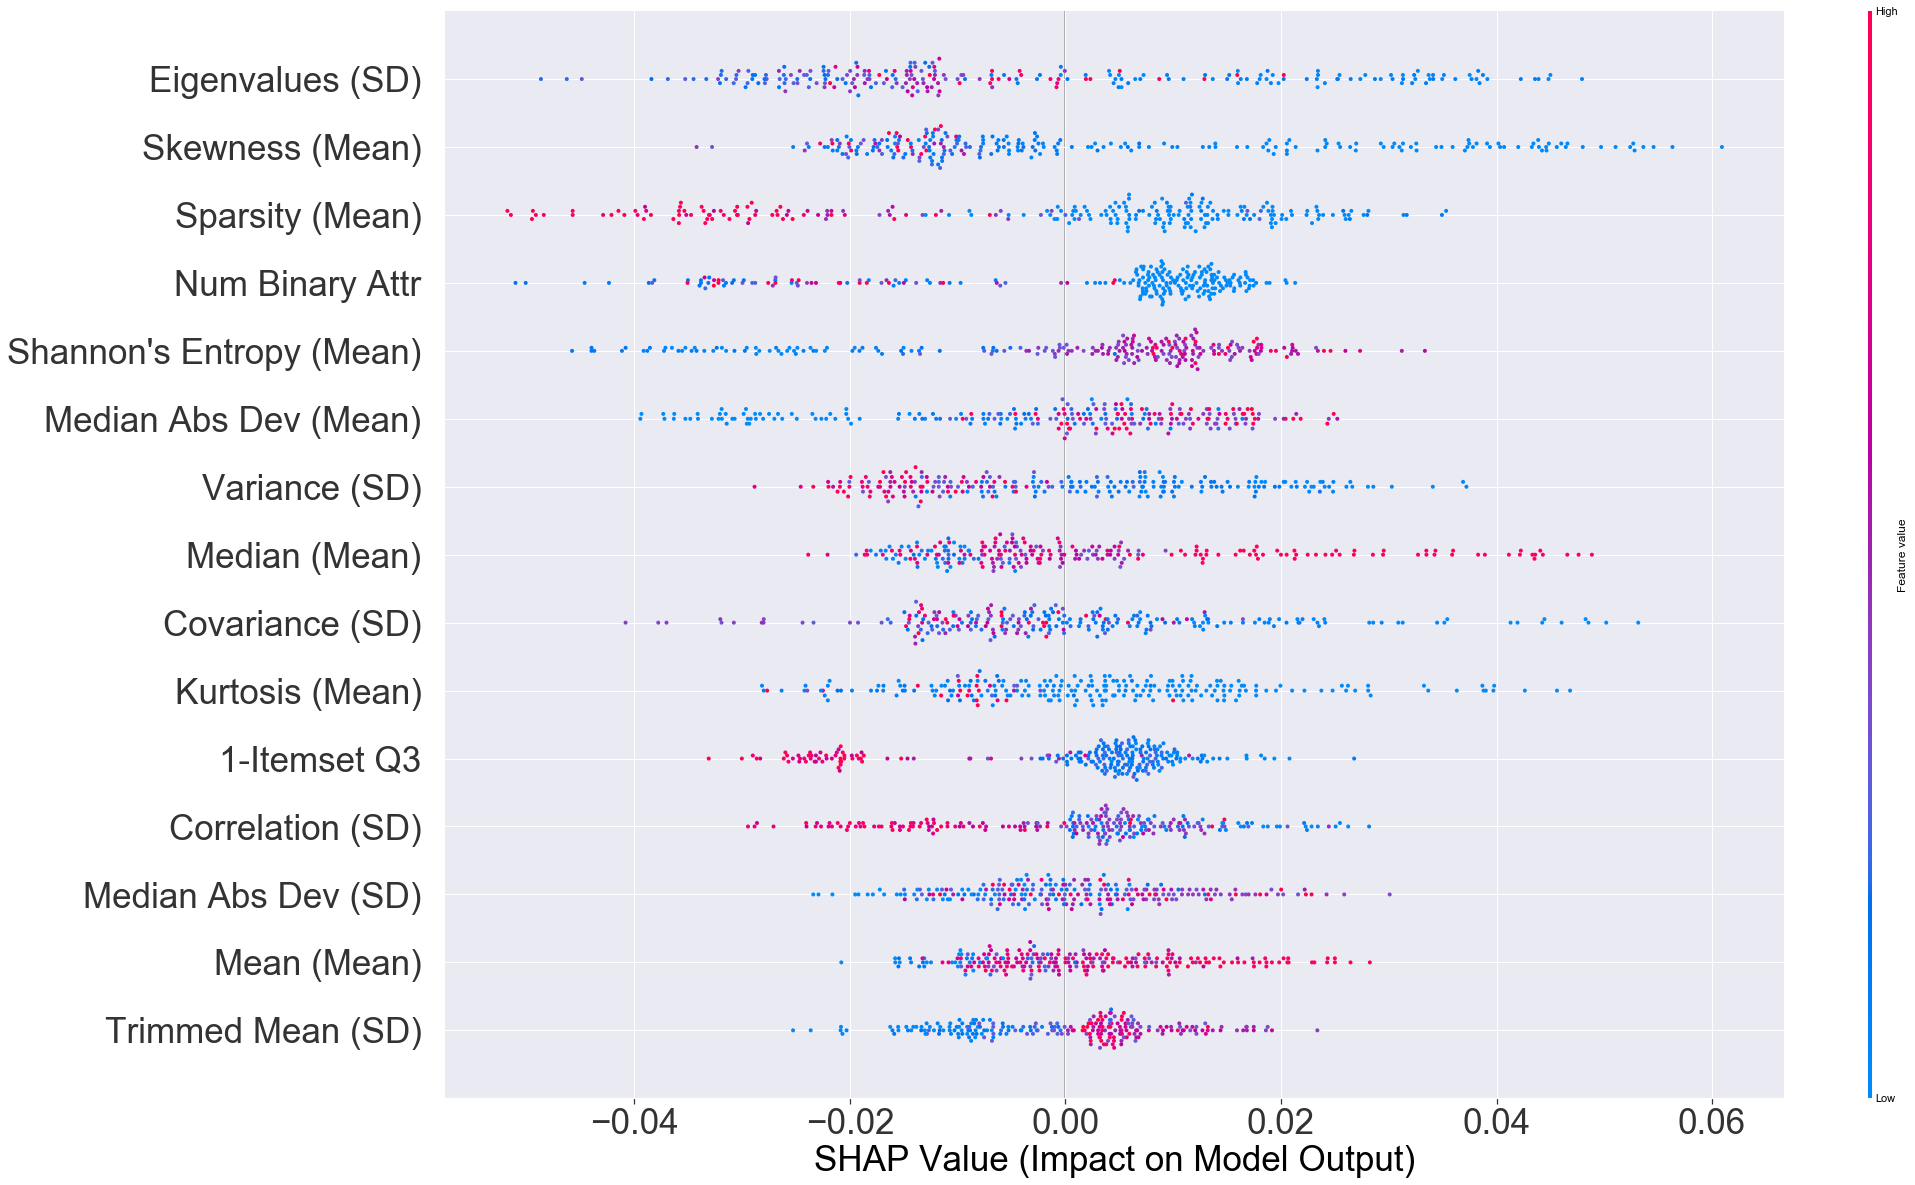

In [154]:
plt_shap = shap.summary_plot(shap_values[1], 
                             features=X_train, 
                             feature_names=X_train.columns, 
                             show=False,
                             plot_size=(30,SS),
                             max_display=15) 

plt.xlabel('SHAP Value (Impact on Model Output)', fontsize=SIZE)
plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)

plt.savefig("shap_euclidean.png", bbox_inches='tight')

The code below displays the beeswarm plot for the 15 most important features for predicting Manhattan distance.

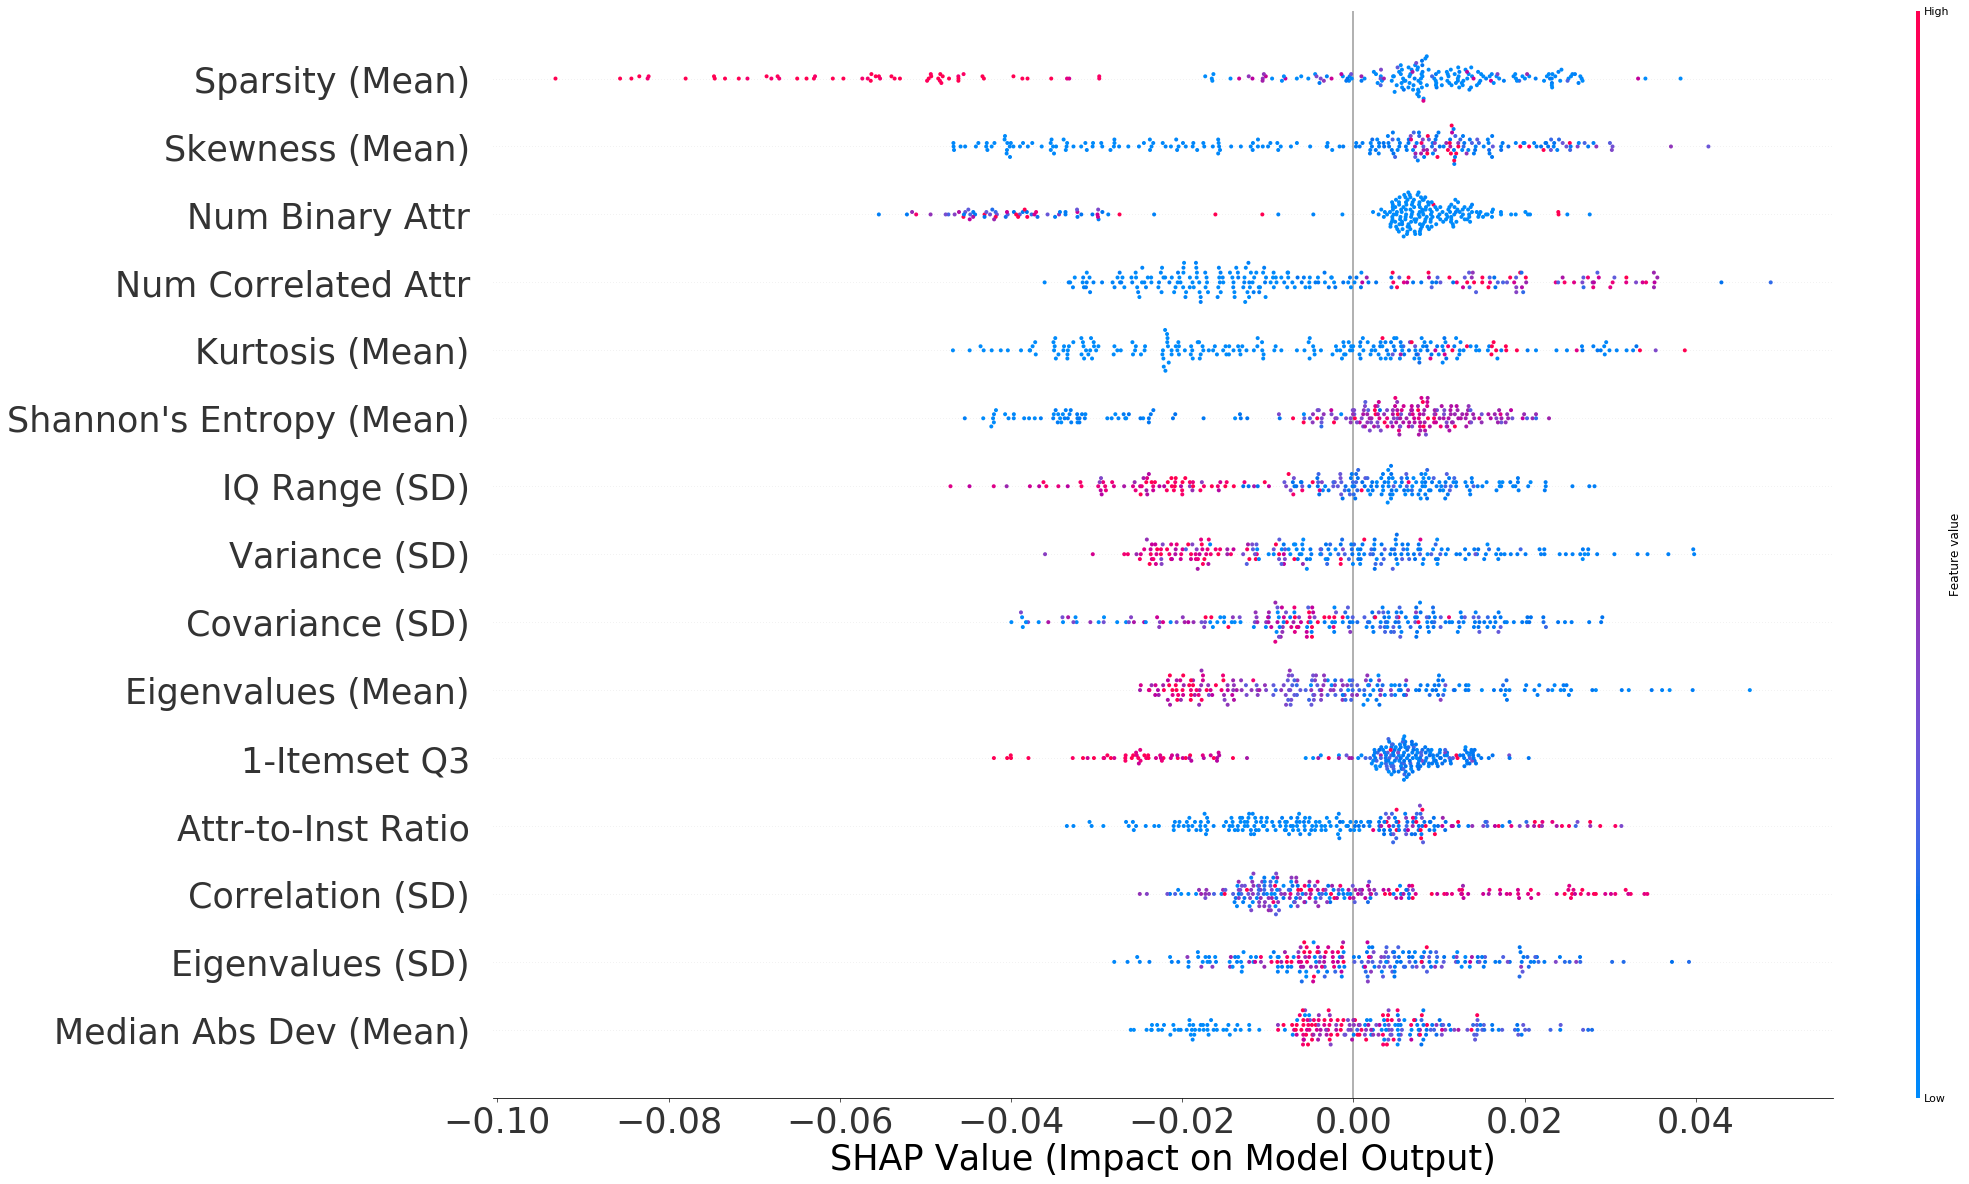

In [117]:
plt_shap = shap.summary_plot(shap_values[2], 
                             features=X_train, 
                             feature_names=X_train.columns, 
                             show=False,
                             plot_size=(30,SS),
                             max_display=15) 

plt.xlabel('SHAP Value (Impact on Model Output)', fontsize=SIZE)
plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)

plt.savefig("shap_manhattan.png",bbox_inches='tight')

<hr>

## B. Feature Effects

The beeswarm visualizations already provide preliminary insights on the relationship between the magnitudes of the (actual) values of the meta-features and their contribution to the likelihood of a prediction (as quantified via the SHAP values). 

Dependence plots were generated to corroborate and investigate these trends.

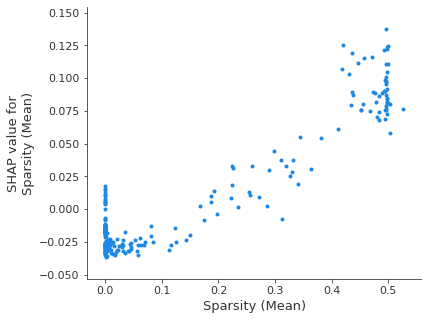

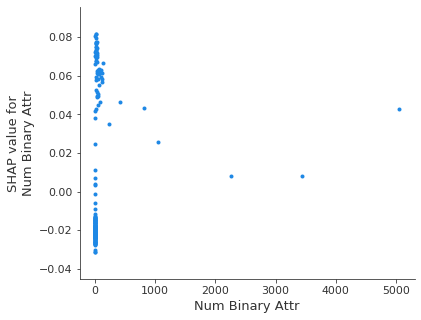

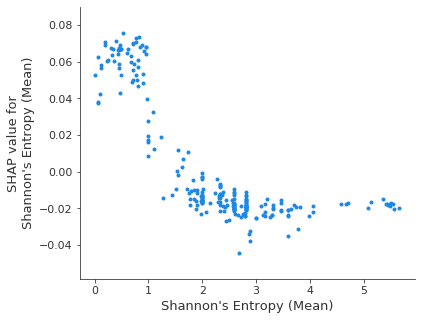

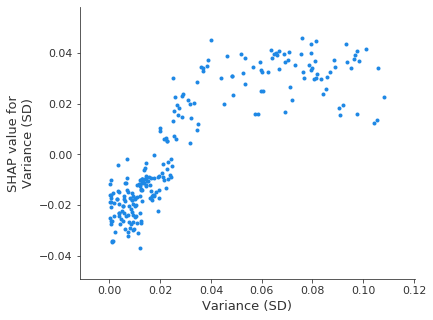

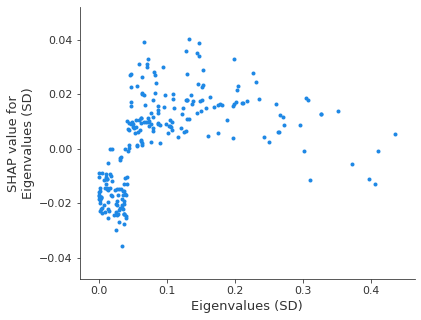

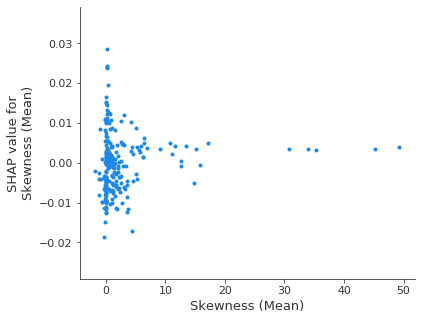

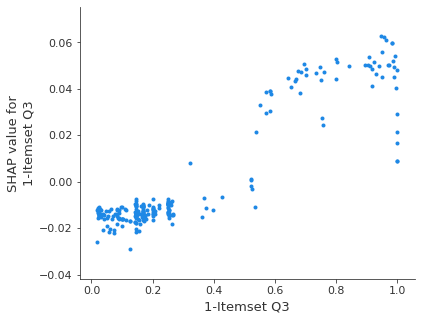

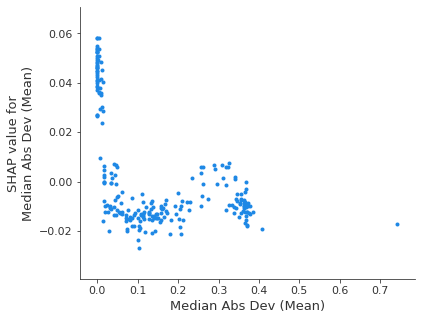

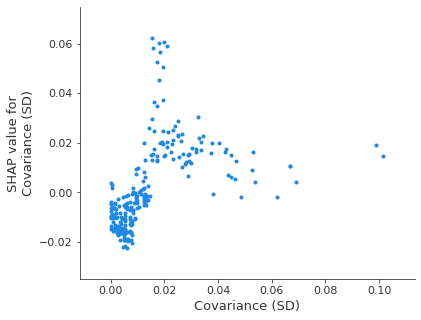

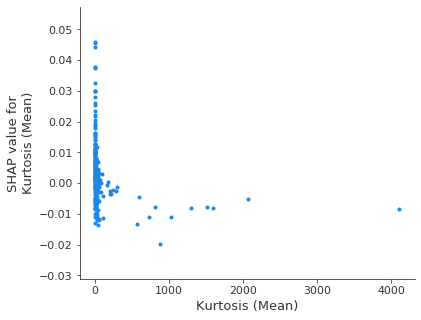

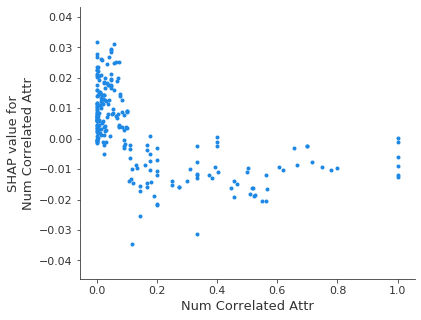

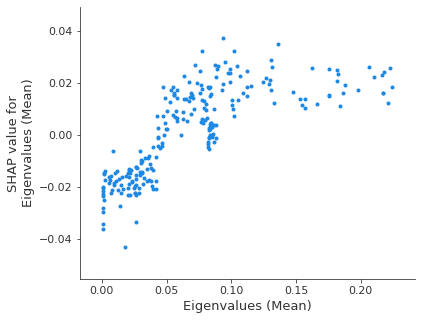

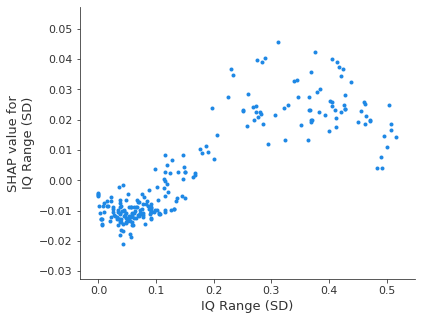

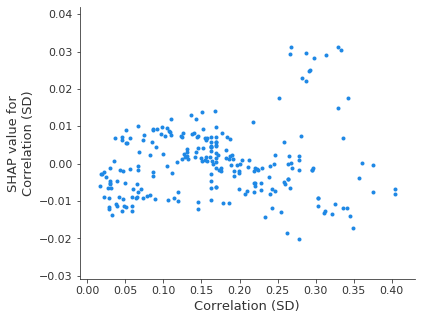

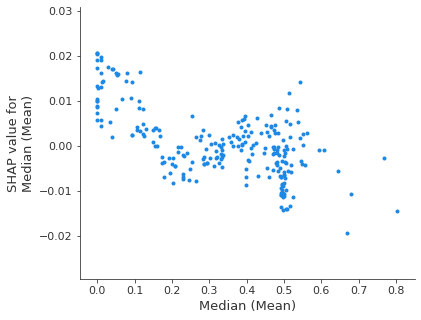

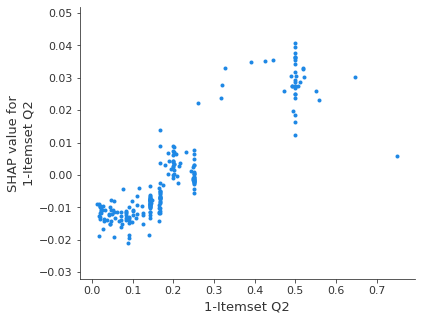

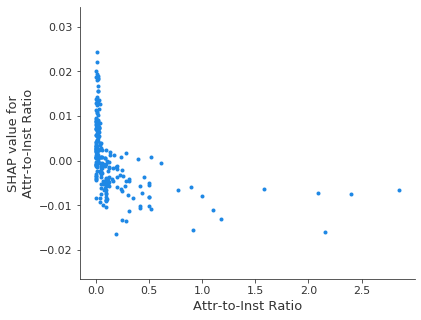

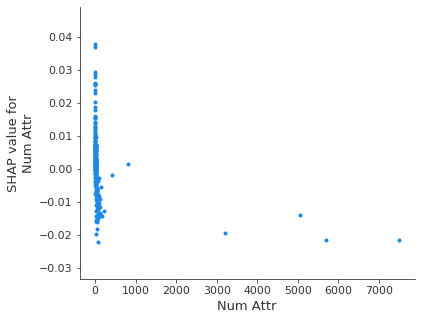

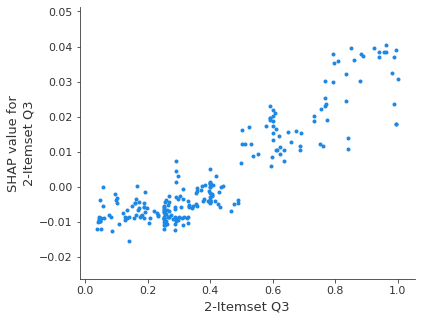

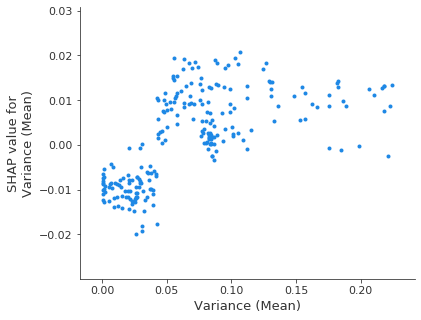

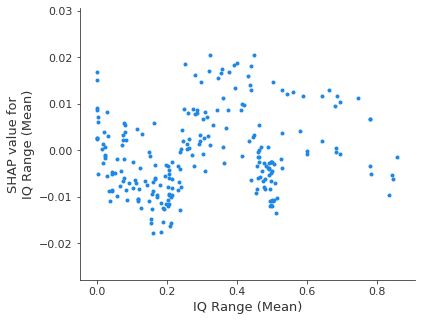

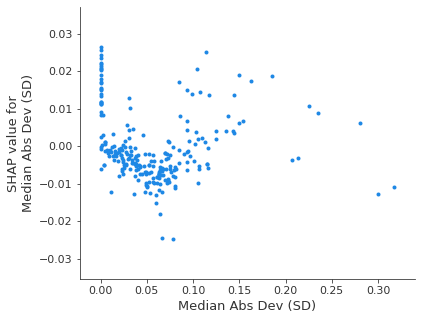

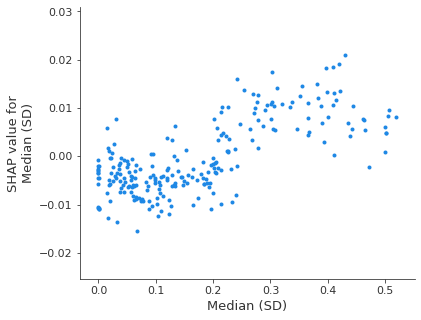

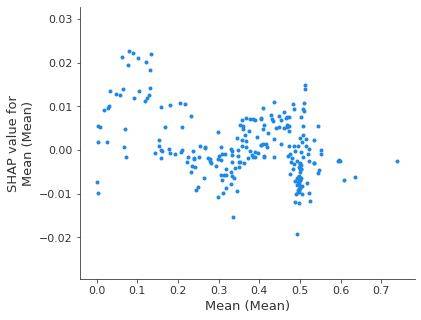

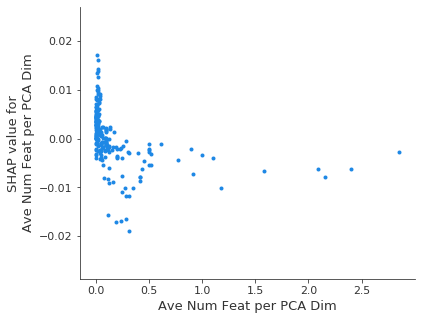

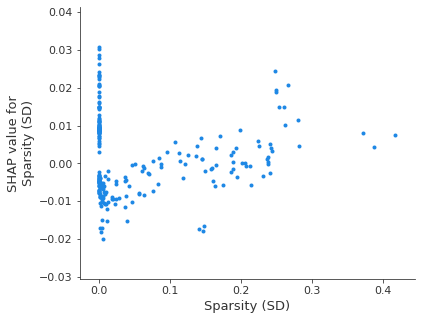

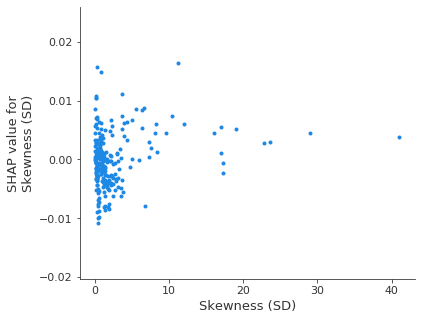

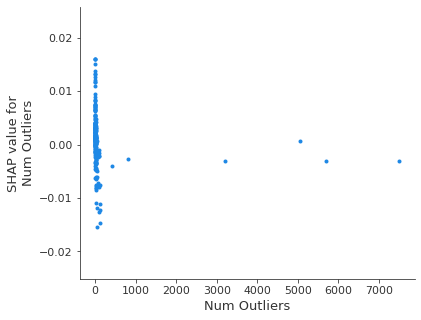

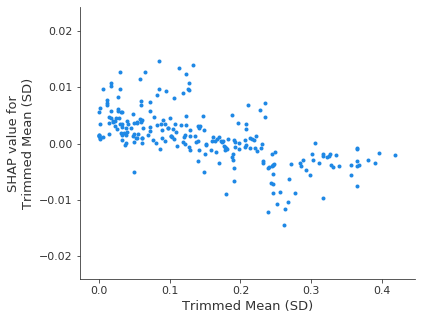

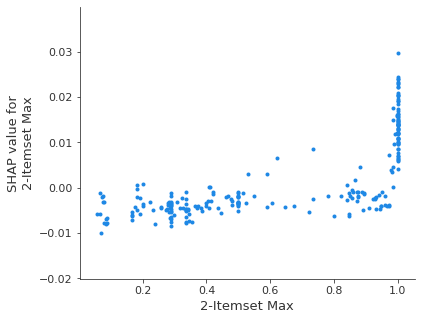

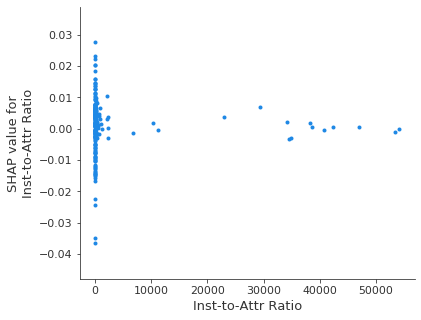

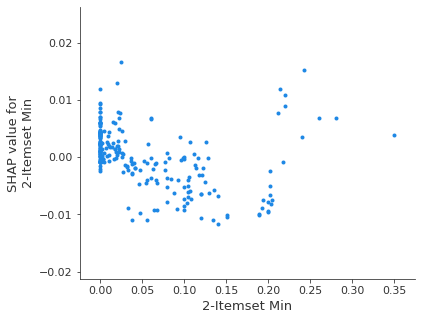

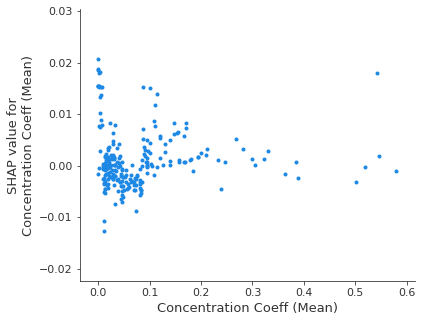

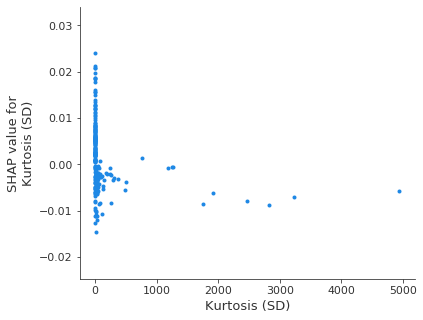

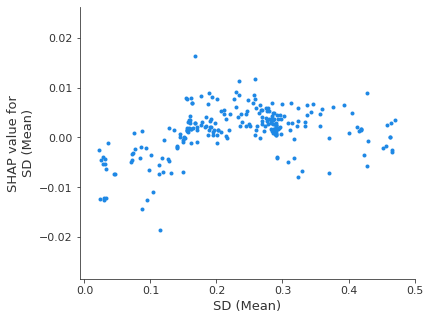

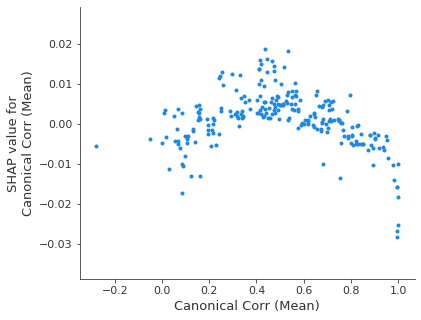

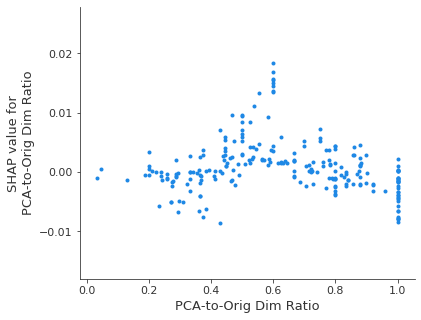

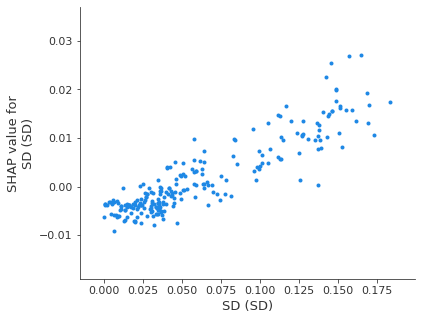

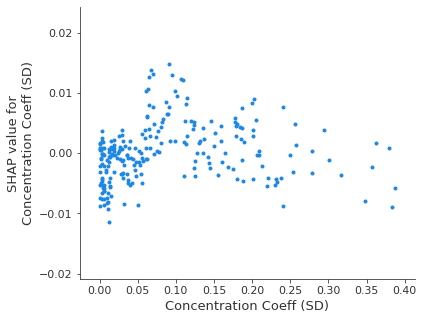

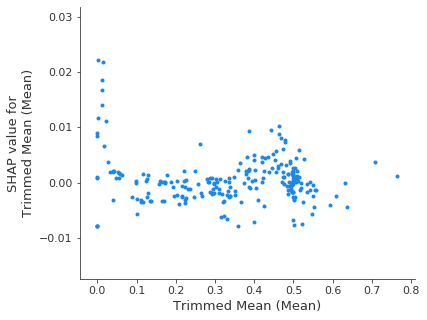

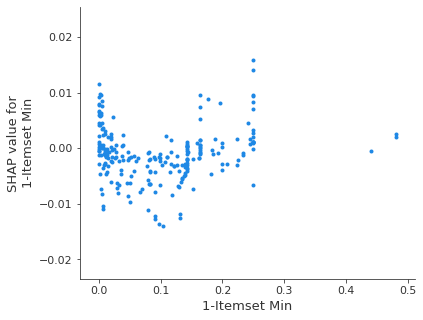

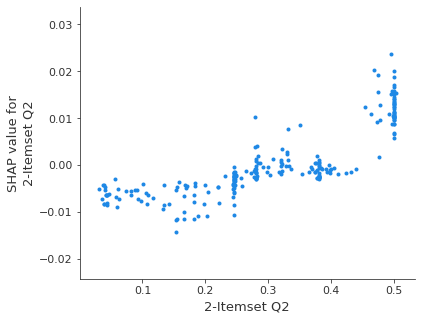

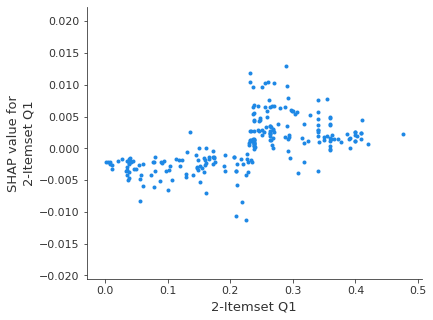

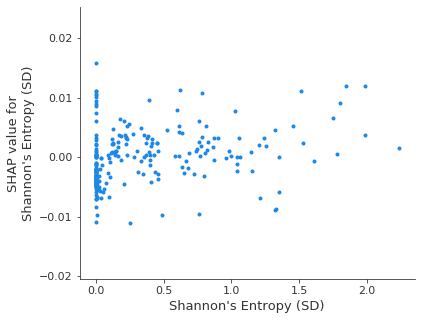

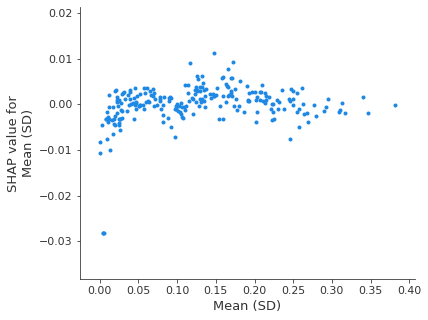

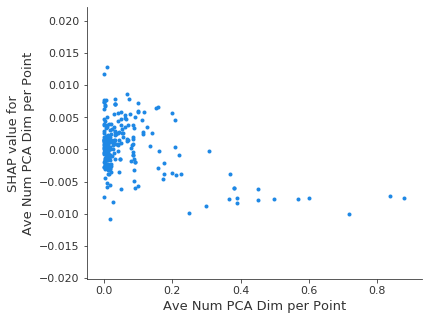

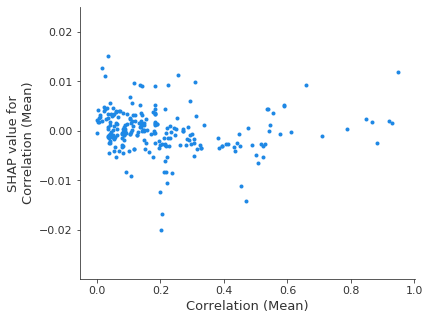

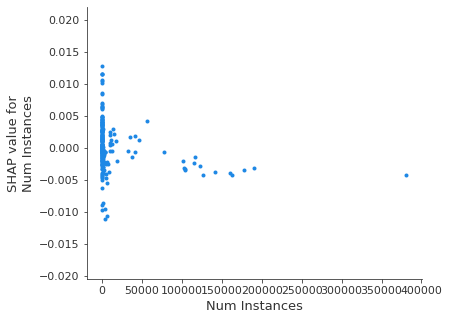

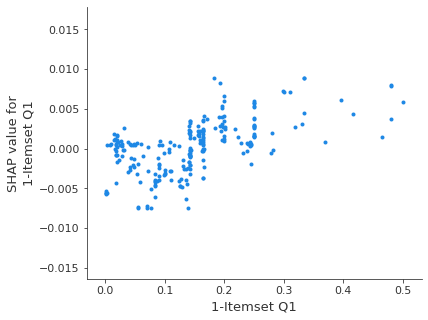

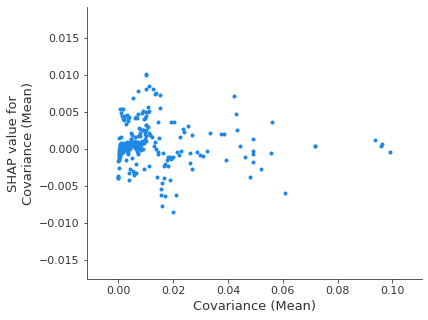

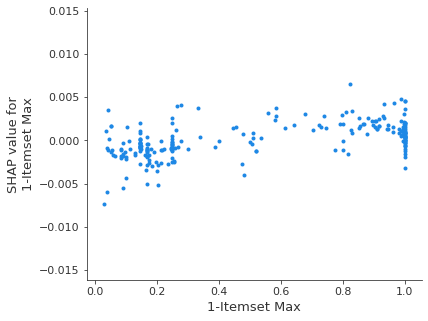

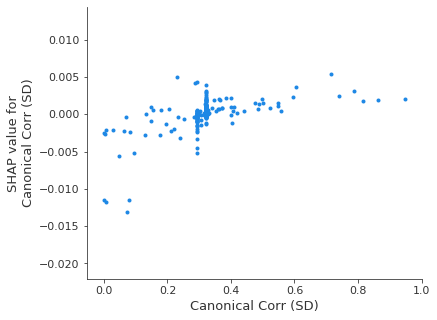

In [23]:
CHEBYSHEV = 0
EUCLIDEAN = 1
MANHATTAN = 2

# Change this line to display dependence plots for other distances
j = CHEBYSHEV

for i in range(52):
    plt_shaps = shap.dependence_plot(feature_importance.values[i][0], shap_values[j], X_train, interaction_index=None)

<hr>

## C. Feature Ablation

To determine how the removal of features would affect the performance of the built meta-learning model, ablation experiments were conducted, with the meta-features ranked based on their global feature importance number (average of the absolute values of the SHAP values) and the number of features incrementally reduced by one by removing the least important features.

In [20]:
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_scores = []

The function below modifies the global accuracy_scores variable by appending the accuracy score of the Random Forest model based only on the top *k* meta-features.

**Parameters**:
- `k`: An integer indicating the top *n* meta-features as input the to the model

**Preconditions**:
- The global accuracy_scores variable exists
- The meta-features are already ranked based on SHAP evaluation

In [119]:
def include_top_k_features(k):
    exclude = list(feature_importance['col_name'])[k:] + ['best_dist_metric_ari', 'best_dist_metric_dbs']
    X = mf.loc[:, ~mf.columns.isin(exclude)]
    y_ari = mf.loc[:, mf.columns.isin(['best_dist_metric_ari'])]
    y_dbs = mf.loc[:, mf.columns.isin(['best_dist_metric_dbs'])]

    X_train, X_test, y_train, y_test = train_test_split(X, y_dbs, test_size=0.3, stratify=y_dbs, random_state=942)
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    pipe = Pipeline(
        [('resample', BorderlineSMOTE(random_state=42)),
        ('model', RandomForestClassifier(ccp_alpha = 0, criterion = 'gini', max_features = 'log2', min_impurity_decrease = 0,
                             min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50, warm_start = True, 
                             random_state=42, n_jobs=-1))]
    )
    
    aa = cross_val_score(estimator=pipe, X = X_train, y = y_train, cv=kf, scoring='accuracy', n_jobs = -1).mean()
    accuracy_scores.append((k, aa))

In [ ]:
# incrementally include each meta-feature to check each performance
for k in range(1, 53):
    include_top_k_features(k)

In [20]:
acc = []
for t in accuracy_scores:
    acc.append(t[1])

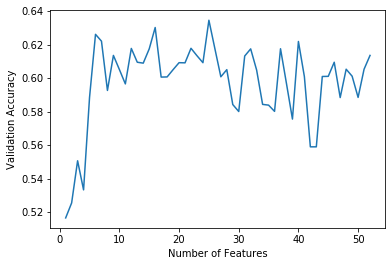

In [21]:
plt.xlabel("Number of Features")
plt.ylabel("Validation Accuracy")
plt.plot(np.arange(1, 53), acc)
plt.show()

In [22]:
max(accuracy_scores, key=lambda item:item[1])

(25, 0.6345744680851064)

<hr>

### Model After Feature Ablation

Based from previous optimization process, a random forest model was reconstructed using the following attributes:
- Top 25 meta-features:
    - sparsity (mean)
    - number of binary attributes
    - Shannon's entropy (mean)
    - variance (sd)
    - eigenvalues (sd)
    - skewness (mean)
    - one-itemset (Q3)
    - median absolute deviation (mean)
    - covariance (sd)
    - kurtosis (mean)
    - number of correlated attributes
    - eigenvalues (mean)
    - IQ range (sd)
    - correlation (sd)
    - median (mean)
    - one-itemset (Q2)
    - attribute to instance ratio
    - number of attributes
    - two-itemset (Q3)
    - IQ range (mean)
    - median absolute deviation (sd)
    - median (sd)
    - mean (mean)
    - average number of features per PCA dimensions
    - sparsity (sd)
- Hyperparemeters:
    - `Number of trees`: 50
    - `Splitting criterion`: Gini
    - `Maximum depth`: 15
    - `Minimum number of samples to be leaf node`: 3
    - `Minimum number of samples to split internal node`: 2
    - `Number of features to consider at each split`: log<sub>2</sub> of the number of features
    - `Warm start`: True
    - `Minimum impurity decrease`: 0.0
    - `Complexity parameter for minimal cost-complexity pruning`: 0.0

              precision    recall  f1-score   support

   chebyshev     0.8000    0.8571    0.8276        42
   euclidean     0.6842    0.7222    0.7027        36
   manhattan     0.5789    0.4583    0.5116        24

    accuracy                         0.7157       102
   macro avg     0.6877    0.6792    0.6806       102
weighted avg     0.7071    0.7157    0.7092       102



[Text(0, 0.5, 'Chebyshev'),
 Text(0, 1.5, 'Euclidean'),
 Text(0, 2.5, 'Manhattan')]

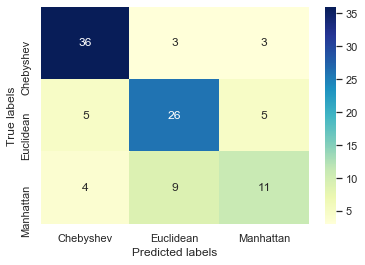

In [165]:
exclude = list(feature_importance['col_name'])[25:] + ['best_dist_metric_ari', 'best_dist_metric_dbs']
X = mf.loc[:, ~mf.columns.isin(exclude)]
y_dbs = mf.loc[:, mf.columns.isin(['best_dist_metric_dbs'])]

X_train, X_test, y_train, y_test = train_test_split(X, y_dbs, stratify = y_dbs, test_size=0.3, random_state=942)
X_train_rs, y_train_rs = BorderlineSMOTE(random_state=42).fit_resample(X_train, y_train)

clf = RandomForestClassifier(ccp_alpha = 0, criterion = 'gini', max_features = 'log2', min_impurity_decrease = 0,
                         min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50, warm_start = True, 
                         random_state=42, n_jobs=-1, max_depth=15)

clf.fit(X_train_rs, y_train_rs.values.ravel())
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()

sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='g', ax=ax) 
label_font = {'size':'12'}

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

title_font = {'fontsize':'12'}
ax.xaxis.set_ticklabels(['Chebyshev', 'Euclidean', 'Manhattan'])
ax.yaxis.set_ticklabels(['Chebyshev', 'Euclidean', 'Manhattan'])

<hr>

## Part VI: Error Analysis

The misclassifications in the test set were analyzed by evaluating how each meta-feature either increases or descreases the likeliheood of a prediction.

In [24]:
misclassified = []

for idx, true, pred in zip(y_test.index, y_test.values.ravel(), y_pred):
    if true != pred:
        misclassified.append(idx)
        
print(len(misclassified))

29


In [32]:
ec_local = []
ec_trues = []
ec_preds = []

sc_local = []
sc_trues = []
sc_preds = []

ce_local = []
ce_trues = []
ce_preds = []

se_local = []
se_trues = []
se_preds = []

cs_local = []
cs_trues = []
cs_preds = []

es_local = []
es_trues = []
es_preds = []

idx = 0
for true, pred in zip(y_test.values.ravel(), y_pred):
    if true[0] == 'e' and pred[0] == 'c':
        ec_local.append(idx)
        ec_trues.append(true)
        ec_preds.append(pred)
        
    elif true[0] == 'm' and pred[0] == 'c':
        sc_local.append(idx)
        sc_trues.append(true)
        sc_preds.append(pred)
        
    elif true[0] == 'c' and pred[0] == 'e':
        ce_local.append(idx)
        ce_trues.append(true)
        ce_preds.append(pred)
        
    elif true[0] == 'm' and pred[0] == 'e':
        se_local.append(idx)
        se_trues.append(true)
        se_preds.append(pred)
        
    elif true[0] == 'c' and pred[0] == 'm':
        cs_local.append(idx)
        cs_trues.append(idx)
        cs_preds.append(idx)
        
    elif true[0] == 'e' and pred[0] == 'm':
        es_local.append(idx)
        es_trues.append(true)
        es_preds.append(pred)
        
    idx += 1

In [33]:
shap.initjs()

In [48]:
PRED_IDX = 1
SAMPLE_IDX = 2

CHEBY = 0
EUCLID = 1
STD_EUCLID = 2

explainer = shap.TreeExplainer(clf)

for SAMPLE_IDX in es_local:
    shap_values = explainer.shap_values(X_test)
    display(shap.force_plot(explainer.expected_value[STD_EUCLID], shap_values[STD_EUCLID][SAMPLE_IDX], X_test.values[SAMPLE_IDX], 
                    feature_names=X_test.columns))
    
    print("======================")

<hr>

## PART VII: Hypothesis Testing

To further evaluate the performance of the built meta- learning model, its mean recommendation accuracy (RA) was compared with the mean RA values if fixed and randomly chosen distance measures were selected. The RA compares the clustering quality relative to the best- and worst-performing distance measures.

<div class="alert alert-block alert-info1">

$$\text{RA} = \frac{\text{DBS}_\text{rec} - \text{DBS}_\text{worst}}{\text{DBS}_\text{best} - \text{DBS}_\text{worst}}$$

</div>

In [18]:
folder = "dataset_labels/txt_indiv"
datasets = listdir(folder)

NOT_APPLICABLE = "NOT_APPLICABLE"

# Number of output text files for each dataset (ARI, DBS, and time elapsed)
CHUNKED_BY = 3 
chunked_datasets=[datasets[i:i + CHUNKED_BY] for i in range(0, len(datasets), CHUNKED_BY)]

HEADER = "dataset,chebyshev,euclidean,manhattan\n"
f_out = open('results_top_three_metrics.csv', 'w')
f_out.write(HEADER)

for dataset in chunked_datasets:
    ari, dbs, time_elapsed = dataset[0], dataset[1], dataset[2]

    f_dbs = open(f"./dataset_labels/txt_indiv/{dbs}", "r")
    dbs_dict = f_dbs.read()
    dbs_dict = dbs_dict.replace("'", '"')
    dbs_dict = json.loads(dbs_dict)
    f_dbs.close()
    
    filename, _ = ari.rsplit('_', 1)

    DATA = f"{filename},{dbs_dict['chebyshev']},{dbs_dict['euclidean']},{dbs_dict['manhattan']}\n"
    f_out.write(DATA)

f_out.close()

Obtain the Davies-Bouldin scores after clustering the datasets for each of the three distance metrics.

In [242]:
hypo_df = pd.read_csv('results_top_metrics.csv')
hypo_df = pd.DataFrame(hypo_df, index=X_test.index)
hypo_df

,dataset,chebyshev,euclidean,manhattan
128,fri_c0_250_10,4.247357,3.159375,3.284734
110,drivPoints,0.814558,0.785437,0.780181
295,sleep-stress,0.512391,0.529920,0.511270
234,php65iCJh,2.269274,1.876215,1.774320
333,Wholesale customers data,1.198140,1.086805,1.034300
...,...,...,...,...
279,prnn_synth,1.018119,0.977052,1.193013
243,phpGCUgKd,2.969864,2.107642,2.208767
98,dataset_59_ionosphere,1.840998,1.537383,1.599728
181,fri_c4_500_10,2.936246,2.008330,1.999256


Create a table that incorporates information about the best- and worst-performing distance metrics, as well as the recommended and randomly chosen distance metrics.

In [243]:
NOT_APPLICABLE = "NOT_APPLICABLE"

best = []
worst = []
recom = []
rdm = []

idx = 0
for _, row in hypo_df.iterrows():   
    results_sorted = []

    if row['chebyshev'] != NOT_APPLICABLE:
        results_sorted.append(float(row['chebyshev']))
    if row['euclidean'] != NOT_APPLICABLE:
        results_sorted.append(float(row['euclidean']))
    if row['manhattan'] != NOT_APPLICABLE:
        results_sorted.append(float(row['manhattan']))
            
    results_sorted.sort()
    best.append(results_sorted[0])
    worst.append(results_sorted[-1])
    
    recom.append(y_pred[idx])
    idx += 1
    
    random.seed(idx)
    rand_num = random.randint(0, 2)
    if rand_num == 0:
        rdm.append('chebyshev')
    elif rand_num == 1:
        rdm.append('euclidean')
    elif rand_num == 2:
        rdm.append('manhattan')
    
        
hypo_df['best'] = best
hypo_df['worst'] = worst
hypo_df['recom'] = recom
hypo_df['random'] = rdm
hypo_df

,dataset,chebyshev,euclidean,manhattan,best,worst,recom,random
128,fri_c0_250_10,4.247357,3.159375,3.284734,3.159375,4.247357,euclidean,chebyshev
110,drivPoints,0.814558,0.785437,0.780181,0.780181,0.814558,euclidean,chebyshev
295,sleep-stress,0.512391,0.529920,0.511270,0.511270,0.529920,euclidean,chebyshev
234,php65iCJh,2.269274,1.876215,1.774320,1.774320,2.269274,chebyshev,chebyshev
333,Wholesale customers data,1.198140,1.086805,1.034300,1.034300,1.198140,manhattan,manhattan
...,...,...,...,...,...,...,...,...
279,prnn_synth,1.018119,0.977052,1.193013,0.977052,1.193013,euclidean,euclidean
243,phpGCUgKd,2.969864,2.107642,2.208767,2.107642,2.969864,euclidean,euclidean
98,dataset_59_ionosphere,1.840998,1.537383,1.599728,1.537383,1.840998,euclidean,chebyshev
181,fri_c4_500_10,2.936246,2.008330,1.999256,1.999256,2.936246,euclidean,manhattan


Calculate the recommendation accuracy using the formula

<div class="alert alert-block alert-info1">

$$\text{RA} = \frac{\text{DBS}_\text{rec} - \text{DBS}_\text{worst}}{\text{DBS}_\text{best} - \text{DBS}_\text{worst}}$$

</div>

In [244]:
EPSILON = 1e-9

ra_chebyshev = []
ra_euclidean = []
ra_manhattan = []

ra_recom = []
ra_rdm = []

for _, row in hypo_df.iterrows():
    c = (row['chebyshev'] - row['worst']) / (row['best'] - row['worst'] + EPSILON)
    e = (row['euclidean'] - row['worst']) / (row['best'] - row['worst'] + EPSILON)
    if row['manhattan'] != NOT_APPLICABLE:
        s = (float(row['manhattan']) - float(row['worst'])) / (row['best'] - row['worst'] + EPSILON)
    
    if row['chebyshev'] - row['worst'] == 0:
        ra_chebyshev.append(0)
    elif row['chebyshev'] - row['best'] == 0:
        ra_chebyshev.append(1)
    else:
        ra_chebyshev.append(c)
        
    if row['euclidean'] - row['worst'] == 0:
        ra_euclidean.append(0)
    elif row['euclidean'] - row['best'] == 0:
        ra_euclidean.append(1)
    else:
        ra_euclidean.append(e)
    
    if row['manhattan'] == NOT_APPLICABLE:
        ra_manhattan.append(0)
    elif float(row['manhattan']) - row['worst'] == 0:
        ra_manhattan.append(0)
    elif float(row['manhattan']) - row['best'] == 0:
        ra_manhattan.append(1)
    else:
        ra_manhattan.append(s)
        
        
    # Recommended
    if row['recom'] == 'chebyshev':
        if row['chebyshev'] - row['worst'] == 0:
            ra_recom.append(0)
        elif row['chebyshev'] - row['best'] == 0:
            ra_recom.append(1)
        else:
            ra_recom.append(c)
    elif row['recom'] == 'euclidean':
        if row['euclidean'] - row['worst'] == 0:
            ra_recom.append(0)
        elif row['euclidean'] - row['best'] == 0:
            ra_recom.append(1)
        else:
            ra_recom.append(e)
    else:
        if row['manhattan'] == NOT_APPLICABLE:
            ra_recom.append(0)
        elif float(row['manhattan']) - row['worst'] == 0:
            ra_recom.append(0)
        elif float(row['manhattan']) - row['best'] == 0:
            ra_recom.append(1)
        else:
            ra_recom.append(s)
       
    
    # Random
    if row['random'] == 'chebyshev':
        if row['chebyshev'] - row['worst'] == 0:
            ra_rdm.append(0)
        elif row['chebyshev'] - row['best'] == 0:
            ra_rdm.append(1)
        else:
            ra_rdm.append(c)
    elif row['random'] == 'euclidean':
        if row['euclidean'] - row['worst'] == 0:
            ra_rdm.append(0)
        elif row['euclidean'] - row['best'] == 0:
            ra_rdm.append(1)
        else:
            ra_rdm.append(e)
    else:
        if row['manhattan'] == NOT_APPLICABLE:
            ra_rdm.append(0)
        elif float(row['manhattan']) - row['worst'] == 0:
            ra_rdm.append(0)
        elif float(row['manhattan']) - row['best'] == 0:
            ra_rdm.append(1)
        else:
            ra_rdm.append(s)
    
    
hypo_df['Fixed Chebyshev'] = ra_chebyshev
hypo_df['Fixed Euclidean'] = ra_euclidean
hypo_df['Fixed Manhattan'] = ra_manhattan
hypo_df['Recommended'] = ra_recom
hypo_df['Random'] = ra_rdm
hypo_df

,dataset,chebyshev,euclidean,manhattan,best,worst,recom,random,Fixed Chebyshev,Fixed Euclidean,Fixed Manhattan,Recommended,Random
128,fri_c0_250_10,4.247357,3.159375,3.284734,3.159375,4.247357,euclidean,chebyshev,0.000000,1.000000,0.884778,1.000000,0.000000
110,drivPoints,0.814558,0.785437,0.780181,0.780181,0.814558,euclidean,chebyshev,0.000000,0.847111,1.000000,0.847111,0.000000
295,sleep-stress,0.512391,0.529920,0.511270,0.511270,0.529920,euclidean,chebyshev,0.939888,0.000000,1.000000,0.000000,0.939888
234,php65iCJh,2.269274,1.876215,1.774320,1.774320,2.269274,chebyshev,chebyshev,0.000000,0.794132,1.000000,0.000000,0.000000
333,Wholesale customers data,1.198140,1.086805,1.034300,1.034300,1.198140,manhattan,manhattan,0.000000,0.679532,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,prnn_synth,1.018119,0.977052,1.193013,0.977052,1.193013,euclidean,euclidean,0.809839,1.000000,0.000000,1.000000,1.000000
243,phpGCUgKd,2.969864,2.107642,2.208767,2.107642,2.969864,euclidean,euclidean,0.000000,1.000000,0.882716,1.000000,1.000000
98,dataset_59_ionosphere,1.840998,1.537383,1.599728,1.537383,1.840998,euclidean,chebyshev,0.000000,1.000000,0.794658,1.000000,0.000000
181,fri_c4_500_10,2.936246,2.008330,1.999256,1.999256,2.936246,euclidean,manhattan,0.000000,0.990315,1.000000,0.990315,1.000000


Clean the table and retain only the mean recommendation accuracies.

In [245]:
ra_df = hypo_df[['Fixed Chebyshev', 'Fixed Euclidean', 'Fixed Manhattan', 'Recommended', 'Random']]
ra_df = ra_df.dropna()

Display the summary statistics; the row of interest is the mean of the recommendation accuracies of the fixed, random, and recommended distance selection methods.

In [246]:
ra_df.describe()

,Fixed Chebyshev,Fixed Euclidean,Fixed Manhattan,Recommended,Random
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.470188,0.574564,0.455545,0.836040,0.521549
std,0.487047,0.452641,0.458567,0.346601,0.465163
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000264,0.000000,0.994785,0.000000
50%,0.154839,0.849571,0.393396,1.000000,0.602439
75%,1.000000,1.000000,0.999453,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Save the results into a CSV file.

In [106]:
ra_df.to_csv('ra.csv', index=False)

Apply the **Scott-Knott effect size difference test** [[1]](https://dl.acm.org/doi/10.1109/TSE.2016.2584050) to test for significance in the differences of the mean recommendation accuracies. This statistical test can be run (and the plot can be generated) using the [ScottKnottESD](https://github.com/klainfo/ScottKnottESD) package that is available in R. The sequence of R instructions is as follows:

**Installation**

**Execution**

<hr>

## References

[1] C. Tantithamthavorn, S. McIntosh, A. E. Hassan, and K. Matsumoto, “An empirical comparison of model validation techniques for defect
prediction models,” *IEEE Transactions on Software Engineering*, vol. 43, no. 1, pp. 1–18, 2017.